In [1]:
import os


In [2]:
%%time
print(os.getcwd())

C:\Users\shrey\OneDrive\upgrap\Course 1- Statistics & Eda
Wall time: 0 ns


In [9]:
#os.chdir(C:/Users/shrey/OneDrive/upgrap)

#os.chdir("nameof the folder or drive")

In [1]:
#use print format 
a='data'
b='analytics'
c='pandas'
print("{2} {1} using {0}".format(c,b,a))

data analytics using pandas




TO CHANGE THE WORKING DIRECCTORY

Open cmd (or Anaconda Prompt) and run jupyter notebook --generate-config.

This writes a file to C:\Users\username\.jupyter\jupyter_notebook_config.

Change the line #c.NotebookApp.notebook_dir = ''

to 

c.NotebookApp.notebook_dir = 'D:\jupyter_nb_files'

# Remember

# 1. no backslash at the end of the path. That seems to throw an exception and revert to home.

# 2. restart jupyter notebook after saving the changes - just close and launch a new session.

# This is big header
## This is a Header

* First Bullet Point
* Second point
### A small Header


In [4]:
! put an exclamation in front of a comment to run a commandline comment

'put' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
%%bash 
for entire cell to be run as a bash script

Couldn't find program: 'bash'


###  sort the values in a pandas dataframe

import pandas as pd 
  
# making data frame from csv file 
data = pd.read_csv("nba.csv") 
  
# sorting data frame by name 
data.sort_values(by="Column or row Name", axis = 0, ascending = True,                                         #df.sort_values(by=['col1', 'col2'])
                 inplace = True, na_position ='last') 


# Operations

There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category. Let's show them here in this lecture:

In [10]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### Info on Unique Values

In [11]:
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [14]:
df['col2'].nunique()

3

In [15]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### Selecting Data

In [16]:
#Select from DataFrame using criteria from multiple columns
newdf = df[(df['col1']>2) & (df['col2']==444)]

In [17]:
newdf

,col1,col2,col3
3,4,444,xyz


### Applying Functions

In [18]:
def times2(x):
    return x*2

In [22]:
df.apply(times2)

,col1,col2,col3
0,2,888,abcabc
1,4,1110,defdef
2,6,1332,ghighi
3,8,888,xyzxyz


In [25]:
df['col3'].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [26]:
df['col1'].sum()

10

** Permanently Removing a Column**

In [27]:
del df['col1']

In [28]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Get column and index names: **

In [29]:
df.columns

Index(['col2', 'col3'], dtype='object')

In [30]:
df.index

RangeIndex(start=0, stop=4, step=1)

** Sorting and Ordering a DataFrame:**

In [31]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [32]:
df.sort_values(by='col2') #inplace=False by default

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


** Find Null Values or Check for Null Values**

In [33]:
df.isnull()

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [34]:
# Drop rows with NaN Values
df.dropna()

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


** Filling in NaN values with something else: **

In [36]:
import numpy as np

In [37]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [38]:
df.fillna('FILL')

,col1,col2,col3
0,1,FILL,abc
1,2,555,def
2,3,666,ghi
3,FILL,444,xyz


In [39]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}

df = pd.DataFrame(data)

In [40]:
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [42]:
df.pivot_table(values='D',index=['A', 'B'],columns=['C'], aggfunc='mean')

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [40]:
df.groupby(['A', 'B','C'])['D'].mean()

A    B    C
bar  one  x    4
          y    1
     two  y    5
foo  one  x    1
          y    3
     two  x    2
Name: D, dtype: int64

In [43]:
df.groupby(['A', 'B','C'])['D'].mean().unstack() # pivottable looks like this

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [44]:
df.groupby(['A', 'B','C'])['D'].mean().unstack().stack()

A    B    C
bar  one  x    4.0
          y    1.0
     two  y    5.0
foo  one  x    1.0
          y    3.0
     two  x    2.0
dtype: float64

# Great Job!

## sort a row of a dataframe
* #### gdp_per_capita= df2014_15.iloc[32].sort_values()

In [45]:
# A script to download all states (except UT's) GSVA data for Data I-B

import os
import requests



In [2]:
url_d = 'http://data.gov.in/sites/default/files/dataurl18072017/'
url_r = [
    'NAD-Manipur-GSVA_cur_2014-15.csv',
    'NAD-Meghalaya-GSVA_cur_2016-17.csv',
    'NAD-Jharkhand-GSVA_cur_2015-16.csv',
    'NAD-Nagaland-GSVA_cur_2014-15.csv',
    'NAD-Mizoram-GSVA_cur_2014-15.csv',
    'NAD-Odisha-GSVA_cur_2016-17.csv',
    'NAD-Karnataka-GSVA_cur_2015-16.csv',
    'NAD-Kerala-GSVA_cur_2015-16.csv',
    'NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv',
    'NAD-Tripura-GSVA_cur_2014-15.csv',
    'NAD-Maharashtra-GSVA_cur_2014-15.csv',
    'NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv',
    'NAD-Uttarakhand-GSVA_cur_2015-16.csv',
    'NAD-Punjab-GSVA_cur_2014-15.csv',
    'NAD-Tamil_Nadu-GSVA_cur_2016-17.csv',
    'NAD-Telangana-GSVA_cur_2016-17.csv',
    'NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv',
    'NAD-Rajasthan-GSVA_cur_2014-15.csv',
    'NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv',
    'NAD-Assam-GSVA_cur_2015-16.csv',
    'NAD-Sikkim-GSVA_cur_2015-16.csv',
    'NAD-Bihar-GSVA_cur_2015-16.csv',
    'NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv',
    'NAD-Gujarat-GSVA_cur_2015-16.csv',
    'NAD-Haryana-GSVA_cur_2016-17.csv',
    'NAD-Goa-GSVA_cur_2015-16.csv',
    'NAD-Chhattisgarh-GSVA_cur_2016-17.csv',
]

def fetch_csvs():
    for i in url_r:
        url = url_d+i
        r = requests.get(url)
        print("Downloading: ", i)
        if r.status_code!=200:
            print("Failed")
            exit()
        with open(i, 'wb') as f:
            f.write(r.content)
    print("\nAll files have downloaded :)")

In [3]:
fetch_csvs()

Downloading:  NAD-Manipur-GSVA_cur_2014-15.csv
Downloading:  NAD-Meghalaya-GSVA_cur_2016-17.csv
Downloading:  NAD-Jharkhand-GSVA_cur_2015-16.csv
Downloading:  NAD-Nagaland-GSVA_cur_2014-15.csv
Downloading:  NAD-Mizoram-GSVA_cur_2014-15.csv
Downloading:  NAD-Odisha-GSVA_cur_2016-17.csv
Downloading:  NAD-Karnataka-GSVA_cur_2015-16.csv
Downloading:  NAD-Kerala-GSVA_cur_2015-16.csv
Downloading:  NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv
Downloading:  NAD-Tripura-GSVA_cur_2014-15.csv
Downloading:  NAD-Maharashtra-GSVA_cur_2014-15.csv
Downloading:  NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv
Downloading:  NAD-Uttarakhand-GSVA_cur_2015-16.csv
Downloading:  NAD-Punjab-GSVA_cur_2014-15.csv
Downloading:  NAD-Tamil_Nadu-GSVA_cur_2016-17.csv
Downloading:  NAD-Telangana-GSVA_cur_2016-17.csv
Downloading:  NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv
Downloading:  NAD-Rajasthan-GSVA_cur_2014-15.csv
Downloading:  NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv
Downloading:  NAD-Assam-GSVA_cur_2015-16.csv
Downloading: 

## MERGE JOIN CONCAT DESCRIBED

In [50]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(np.random.randn(5, 4), columns= ['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(4, 3), columns= ['X' , 'C', 'A'])
df3 = pd.DataFrame(np.random.randn(6, 3), columns= ['M', 'N', 'O'])
df4 = pd.DataFrame(np.random.randn(3, 3), columns= ['J', 'K', 'L'])

In [51]:
pd.concat([df1,df2,df3,df4])

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,J,K,L,M,N,O,X
0,0.172863,0.229209,0.775770,-1.502154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.481267,-2.790741,0.221088,-0.093632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.289477,-0.473834,1.654136,0.780503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.916822,-1.540620,1.498892,0.502624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.455723,-0.424168,0.145556,1.183516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1.103959,NaN,0.610375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.757673
1,-0.037024,NaN,0.263572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030218
2,0.969952,NaN,-2.229728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.655419
3,0.356551,NaN,-1.946501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001819
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.822877,1.607033,1.325715,NaN


In [56]:
pd.concat([df1,df2,df3,df4],axis=1)

,A,B,C,D,X,C,A,M,N,O,J,K,L
0,0.172863,0.229209,0.775770,-1.502154,-0.757673,0.610375,1.103959,0.822877,1.607033,1.325715,-0.715294,-0.430580,0.642000
1,-0.481267,-2.790741,0.221088,-0.093632,-0.030218,0.263572,-0.037024,-0.519097,1.363700,-1.204289,-0.483221,0.961174,-0.112902
2,0.289477,-0.473834,1.654136,0.780503,-0.655419,-2.229728,0.969952,-1.570441,-0.635172,1.457331,-0.743605,0.389718,-2.519336
3,0.916822,-1.540620,1.498892,0.502624,0.001819,-1.946501,0.356551,-0.229700,-1.385999,-0.281728,NaN,NaN,NaN
4,-1.455723,-0.424168,0.145556,1.183516,NaN,NaN,NaN,0.691806,-0.676322,-1.496267,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.757311,1.784679,0.582351,NaN,NaN,NaN


In [60]:
df_1mergeouter = pd.merge(df1,df2, how='outer', on='C')

In [61]:
df_1mergeouter

,A_x,B,C,D,X,A_y
0,0.172863,0.229209,0.775770,-1.502154,NaN,NaN
1,-0.481267,-2.790741,0.221088,-0.093632,NaN,NaN
2,0.289477,-0.473834,1.654136,0.780503,NaN,NaN
3,0.916822,-1.540620,1.498892,0.502624,NaN,NaN
4,-1.455723,-0.424168,0.145556,1.183516,NaN,NaN
5,NaN,NaN,0.610375,NaN,-0.757673,1.103959
6,NaN,NaN,0.263572,NaN,-0.030218,-0.037024
7,NaN,NaN,-2.229728,NaN,-0.655419,0.969952
8,NaN,NaN,-1.946501,NaN,0.001819,0.356551


In [66]:
df_1mergeinner = pd.merge(df1,df2, how='inner', on='C')

In [67]:
df_1mergeinner

,A_x,B,C,D,X,A_y


In [68]:
df2

,X,C,A
0,-0.757673,0.610375,1.103959
1,-0.030218,0.263572,-0.037024
2,-0.655419,-2.229728,0.969952
3,0.001819,-1.946501,0.356551


In [51]:
df1.join(df2.set_index("C"),on='C',lsuffix="df1")

,Adf1,B,C,D,X,A
0,0.621689,-0.439456,-1.316281,1.661237,NaN,NaN
1,0.995926,0.921219,0.577532,1.693702,NaN,NaN
2,0.603822,-1.958058,-2.300890,0.582254,NaN,NaN
3,-0.551075,0.226176,1.825479,-2.069684,NaN,NaN
4,-1.027019,-0.133339,-0.615695,-0.276396,NaN,NaN


In [33]:
df1.join(df2.set_index("C"),on='C',lsuffix="df1",how="outer")

,Adf1,B,C,D,X,A
0,0.621689,-0.439456,-1.316281,1.661237,NaN,NaN
1,0.995926,0.921219,0.577532,1.693702,NaN,NaN
2,0.603822,-1.958058,-2.300890,0.582254,NaN,NaN
3,-0.551075,0.226176,1.825479,-2.069684,NaN,NaN
4,-1.027019,-0.133339,-0.615695,-0.276396,NaN,NaN
4,NaN,NaN,-0.490110,NaN,1.534762,1.131965
4,NaN,NaN,0.226715,NaN,0.515421,0.302026
4,NaN,NaN,0.179691,NaN,-0.055694,-0.201955
4,NaN,NaN,1.076683,NaN,-2.890734,0.429385


In [5]:
dataa = {'spike-2': [1,2,3], 'hey spke': [4,5,6], 'spiked-in': [7,8,9], 'no': [10,11,12]}
datab = {'spike-2': [1,2,3,4], 'hey spke': [4,5,7,10], 'spiked': [7,8,9,5], 'no2': [10,11,12,2]}
dfa = pd.DataFrame(dataa)
dfb = pd.DataFrame(datab)

In [70]:
dfa.join(dfb.set_index("spike-2"),on='spike-2',lsuffix="dfa",how="outer")

,spike-2,hey spkedfa,spiked-in,no,hey spke,spiked,no2
0,1,4.0,7.0,10.0,4,7,10
1,2,5.0,8.0,11.0,5,8,11
2,3,6.0,9.0,12.0,7,9,12
2,4,NaN,NaN,NaN,10,5,2


In [1]:
import pandas as pd

In [5]:
dataa = {'spike-1': [1,2,3], 'hey spke1': [4,5,6], 'spiked-in': [7,8,9], 'no1': [10,11,12]}
datab = {'spike-2': [1,2,3,4], 'hey spke2': [4,5,7,10], 'spiked': [7,8,9,5], 'no2': [10,11,12,2]}
dfa = pd.DataFrame(dataa)
dfb = pd.DataFrame(datab)

In [8]:
dfa.join(dfb,lsuffix="dfa",how="outer")

,spike-1,hey spke1,spiked-in,no1,spike-2,hey spke2,spiked,no2
0,1.0,4.0,7.0,10.0,1,4,7,10
1,2.0,5.0,8.0,11.0,2,5,8,11
2,3.0,6.0,9.0,12.0,3,7,9,12
3,NaN,NaN,NaN,NaN,4,10,5,2


# Color palette choices Seaborn

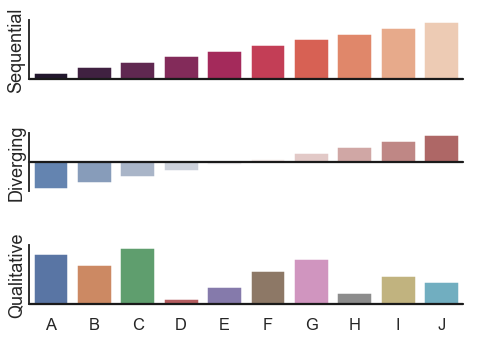

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show()

## Select a row of a dataframe
* ## df.loc['Niko']
## Select a column of a dataframe
* ## df['col_name']

## Select multiple columns as a DataFrame by passing a list to it: df[['col_name1', 'col_name2']]

## df.loc[['Niko', 'Penelope']] : to Select Multiple rows of a dataframe

## square-brace selection with a list of column names,
* ## e.g. data[['column_name_1', 'column_name_2']]
# using numeric indexing with the iloc selector and a list of column numbers, 
* ### e.g. data.iloc[:, [0,1,20,22]]

# numeric row selection using the iloc selector, 
  #### e.g. data.iloc[0:10, :] – select the first 10 rows.
* label-based row selection using the loc selector (this is only applicably if you have set an “index” on your dataframe.
### e.g. data.loc[44, :]
* logical-based row selection using evaluated statements, 
### e.g. data[data["Area"] == "Ireland"] – select the rows where Area value is ‘Ireland’.

* #### print(df.loc[df['B'].isin(['one','three'])])

## create a dataframe consisting only of the missing values from a dataframe
#### state_g=state_gdp.iloc[[4],2:30].isnull().all(axis=0)
* ## state_g[state_g]

# concatenate multiple csv into one df

 ### df = pd.concat(map(pd.read_csv, [' .csv', ' .csv',' .csv']),sort=False)

## DROP

### df.drop(df.iloc[:,:25], axis=1)

### change column names of all the columns

In [ ]:
df.columns = ['country','year','population',
                     'continent','life_exp','gdp_per_cap']

### Change column names of a few columns

## merging the data of all the states in one dataframe¶

### df = df.max(axis=1)         to find the max value in a row

### df.nlargest(5,columns)             to find 5 largest va;ues and simliarly n largest va;ues can be found and smallest

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

## Multindexing

## category.loc[:][("Sector","Primary")]              to access level1 column sector and then next colum primary

In [1]:
L = [[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

In [2]:
L[2:]

[[7, 8, 9, 10]]

In [1]:
T = (3, 5, 7, 11)

In [2]:
T.append(9)

AttributeError: 'tuple' object has no attribute 'append'

Use reduce() to find factorial of given number n

In [9]:

from functools import reduce

In [10]:
n=int(input())

if n==0:
    print(1)
else:
    print(reduce(lambda x, y: x*y, range(1,n+1)))

 9


362880


Set Operations
Description
In a school, there are total 20 students numbered from 1 to 20. You’re given three lists named ‘C’, ‘F’, and ‘H’, representing students who play cricket, football, and hockey, respectively. Based on this information, find out and print the following: 
Students who play all the three sports
Students who play both cricket and football but don’t play hockey
Students who play exactly two of the sports
Students who don’t play any of the three sports

In [18]:
C =[2, 5, 9, 12, 13, 15, 16, 17, 18, 19]
F = [2, 4, 5, 6, 7, 9, 13, 16, 20]
H =[1, 2, 5, 9, 10, 11, 12, 13, 15, 20]



In [21]:
C=set(C)
F=set(F)
H=set(H)
print(sorted(list(C&F&H)))


[2, 5, 9, 13]


In [22]:
print(sorted(list((C&F)-(C&F&H))))
print(sorted(list(((C&F)|(F&H)|(C&H))-(C&F&H))))
print(sorted(list(set(range(1,21))-(C|F|H))))

[16]
[12, 15, 16, 20]
[3, 8, 14]


In [25]:
'''
this shows multiline
comments
'''


'\nthis shows multiline\ncomments\n'

In [3]:
D = {1:['Raj', 22], 2:['Simran', 21], 3:['Rahul', 40]}
for val in D:
     print(val)

1
2
3


In [7]:
S = 'Python'
S[1] = 'i'

TypeError: 'str' object does not support item assignment

In [8]:
print("Hello World"[::-1])

dlroW olleH


In [14]:
print("Hello World"[-1])

d


In [71]:
max("You should code in Python")
#Feedback : max() applied on the string returns the character with the maximum ASCII value; in this case, ‘y’.

'y'

In [15]:
"Miasubaaby".find('a')

2

In [14]:
"Misubaaby".rfind('a')
#feedback : rfind(pattern) returns the index of the first 
#occurrence of the pattern provided, from the back side. 
#Hence, the first appearance of 's' from the rear-end occurs at the index '6'.

6

In [16]:
"Mississipi".count("issi")
#count(pattern) counts the number of times the pattern occurs in the string.
#In this case, although it might seem that ‘issi’ appears twice, both of them are overlapping,
#so it isn’t considered; since after finding a match, the iterator immediately moves to the next character.



1

In [17]:
"Mississipi".count("ssi")

2

In [18]:
"Hello".replace('l', 'e')
#replace(pattern1, pattern2) replaces all the occurrences of 
#pattern1 in the string with pattern2. Hence, all the occurrences of 'l'
#are replaced by 'e'. So, the final string you get is 'Heeeo'.

'Heeeo'

In [19]:
pow(3,4,6)


3

In [20]:
all(4, 6, 0, 1)

TypeError: all() takes exactly one argument (4 given)

In [21]:
all([4, 6, 0, 1]) 

False

In [22]:
ord('A')
#ASCII value

65

In [23]:
divmod(50, 7) 

(7, 1)

In [24]:
def Unknown_func(number):
    if(number == 1):
        return (0)
    else:
        return (1 + Unknown_func(number//2))

In [25]:
Unknown_func(3)

1

In [26]:
def Unknown_func(n):
    if n <= 1:
        return(n)
    else:
        return (Unknown_func(n-1) + Unknown_func(n-2))

In [27]:
Unknown_func(6)

8

In [30]:
n = int(input())
def newfunc(n):
    if n==0:
        return 0
    else:
        for i in range(-n,n+1):
            print(i)
newfunc(n)
        

 6


-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6


In [31]:
# reversing a string also builtin function reversed() can be used
s = input()
def palindrom(n):
    rev=s[::-1].lower()
    if rev==n.lower():
        print("1")
    else:
        print("0")
palindrom(s)

 7


1


In [32]:
s = input()

v=['a','e','i','o','u']
for i in s:
    yourstring = ''.join((str(i),s.translate({ord(i): None for i in v})))
print(yourstring)

 y


yy


In [33]:
s = input()
v=['a','e','i','o','u']
s.translate({ord(i): None for i in v})


 y


'y'

In [34]:

v=str(['a','e','i','o','u'])

vow="jhkgbvkd"
strn=list(vow)
strn.append(v)
print("".join(strn))


jhkgbvkd['a', 'e', 'i', 'o', 'u']


In [35]:
s = input()
v=['a','e','i','o','u']
new=s.translate({ord(i): None for i in v})
vow=""
strn=list(vow)
for i in s:
    if i in v:
        string=strn.append(i)
yourstring = ''.join(("".join(strn),new))
print(yourstring)

 t


t


In [36]:
import math
from math import *
log(40)

3.6888794541139363

In [37]:
abs(4
   )

4

In [38]:
def is_perfect_sqrt(x):
    x = abs(x)
    return int(round(x ** (1. / 2))) 
is_perfect_sqrt(4)

2

In [39]:
def func(x):
     return x % 10

L = [15, 20, 5, 29, 10]
sorted(L, key = func)


[20, 10, 15, 5, 29]

In [45]:
input_str = input()

 hy jkl nmh jio jhg 


In [46]:
stry=list(input_str.split())
stry

['hy', 'jkl', 'nmh', 'jio', 'jhg']

In [85]:
input_str = input()
input_list = list(input_str.split())
def func(x):
     return len(x)


sorted(input_list, key = func)
# Write your code here

 i have three hours to sleep


['i', 'to', 'have', 'three', 'hours', 'sleep']

In [3]:
#Armstrong number Q 5

num = int(input("Enter a number: "))  
sum = 0  
temp = num  
  
while temp > 0:  
   digit = temp % 10  
   sum += digit ** 3  
   temp //= 10  
  
if num == sum:  
   print(num,"is an Armstrong number")  
else:  
   print(num,"is not an Armstrong number")  

Enter a number:  768


768 is not an Armstrong number


In [5]:
#Q 1
n=int(input())
mod = n % 2
if mod>0:
    print("Odd")
else:
    print("even")

 89


Odd


In [ ]:
# q 7 prie numbers

num = int(input("Enter a number: ")) 
# If given number is greater than 1 
if num > 1: 
      
   # Iterate from 2 to n / 2  
   for i in range(2,3): 
         
       # If num is divisible by any number between  
       # 2 and n / 2, it is not prime  
       if (num % i) == 0: 
           print(num, "is not a prime number") 
           break
   else: 
       print(num, "is a prime number") 
  
else: 
   print(num, "is not a prime number") 



#solution from quiz

n=int(input())
out=True
for i in range(2,n):
    if(n%i==0):
        out=False
        break
if out==True:
    print("number entered is prime")
else:
    print("number entered is not prime")


In [ ]:
#Q 6 fibonacci
def fib(n):
    if(n <= 1):
        return n
    else:
        return (fib(n-1) + fib(n-2))

n = int(input("Enter number of terms:"))

print("Fibonacci sequence using Recursion :")
for iter in range(n):
    print(fib(iter))


In [8]:
#ques 9
def equals(array1, array2, n, m): 
  
    # If lengths of array are not  
    # equal means array are not equal 
    if (n != m): 
        return False; 
  
    # Sort both arrays 
    array1.sort(); 
    array2.sort(); 
  
    # Linearly compare elements 
    for i in range(0, n - 1): 
        if (array1[i] != array2[i]): 
            return False; 
  
    # If all elements were same. 
    return True; 
  
# Driver Code 
array1 = [int(x) for x in input().split()]
array2 = [int(x) for x in input().split()]
n = len(array1); 
m = len(array2); 
  
if (equals(array1, array2, n, m)): 
    print("Yes"); 
else: 
    print("No"); 

 4 5 7 9 2
 5 9 7 2 4


Yes


In [79]:
#  q2 count sublists that contain a particular element and output the count in python

lst = [['a', 'b', 'a'], ['a', 'b', 'c'], ['a']]
sublists= sum('a' in sublst for sublst in lst)
print(sublists)

3


In [2]:
import pandas as pd
#sortcolumns

In [28]:
# Ques 8 : select all columns but not the few specified and then sort the resultant dataframe's columns in alphaetical order
du = {'dr': [1, 2, 3, 4, 7], 'db': [4, 5, 6, 9, 5], 'da': [7, 8, 12, 1, 11], 'ba': [1,4,6,7,8], 'be': [1,4,8,9,4], 'bac': [2,5,6,8,9], 'an' : [2,4,5,6,8]}
dff = pd.DataFrame(data=du)
print("Original DataFrame")
print(dff)
to_omit=["db","be"]
dd= dff.drop(to_omit, axis=1)
dd.reindex(sorted(dd.columns),axis=1).head(2)

Original DataFrame
   dr  db  da  ba  be  bac  an
0   1   4   7   1   1    2   2
1   2   5   8   4   4    5   4
2   3   6  12   6   8    6   5
3   4   9   1   7   9    8   6
4   7   5  11   8   4    9   8


,an,ba,bac,da,dr
0,2,1,2,7,1
1,4,4,5,8,2


In [2]:
# q 3 unique value in a list of key value pairs
input_dict = [{"abc":"movies"}, {"abc": "sports"}, {"abc": "music"}, {"xyz": "music"}, {"pqr":"music"}, {"pqr":"movies"},{"pqr":"sports"}, {"pqr":"news"}, {"pqr":"sports"}]
s = set( val for keyval in input_dict for val in keyval.values())
s 

{'movies', 'music', 'news', 'sports'}

In [9]:
input_dict

[{'abc': 'movies'},
 {'abc': 'sports'},
 {'abc': 'music'},
 {'xyz': 'music'},
 {'pqr': 'music'},
 {'pqr': 'movies'},
 {'pqr': 'sports'},
 {'pqr': 'news'},
 {'pqr': 'sports'}]

Divisibility
Consider that m,n,x and y are four positive integers.
Your task is to find all integers between m and n(including m and n) that are divisible by x and y.
The input will contain four lines with m,n,x and y in the same order. The output should contain the number of positive integers divisible by x and y between m and n.

In [10]:

input_list = [1,6,2,3]
m = input_list[0]
n = input_list[1]
x = input_list[2]
y = input_list[3]
print(len(list(filter(lambda i:i%x==0 and i%y==0,range(m,n+1)))))
   
        
   
        

1


In [182]:
def __gcd(x, y): 
  
    if x > y: 
        small = y 
    else: 
        small = x 
    for i in range(1, small+1): 
        if((x % i == 0) and (y % i == 0)): 
            gcd = i 
              
    return gcd 

In [183]:
__gcd(3,9)

3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from numpy import median
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv("tendulkar_ODI.csv", encoding = 'ISO-8859-1')

In [ ]:
df.iloc[7:237]

In [18]:
df[df['Runs']=='TDNB']

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
233,234,TDNB,-,-,-,-,-,-,-,-,v Sri Lanka,Kolkata,8-Feb-07


In [22]:
df[df['Runs']=='DNB']

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
8,9,DNB,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
38,39,DNB,-,-,-,-,-,-,-,2,v Zimbabwe,Pune,25-Mar-93


In [25]:
df=df[df['Runs']!='TDNB']

In [26]:
df=df[df['Runs']!='DNB']

In [29]:
df['Runs'] =df['Runs'].map(lambda x: x.rstrip('*'))

In [30]:
df = df[df['4s'] != '-']

In [ ]:
#df['4s']=='-'

In [31]:
df = df.astype({"Runs": int, "4s": int})


In [32]:
df['Runs'].sort_values().nlargest(10)

280    200
134    186
273    175
266    163
151    146
192    141
156    139
268    138
76     137
123    128
Name: Runs, dtype: int32

In [33]:
df['4s'].nlargest(10).sort_values(ascending=True)

51     15
220    16
242    16
253    16
266    16
192    17
156    19
273    19
134    20
280    25
Name: 4s, dtype: int32

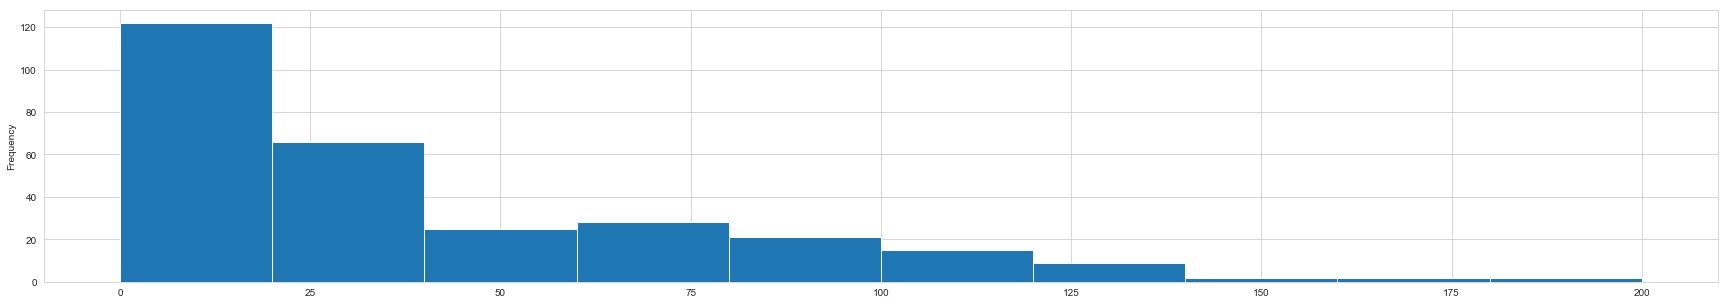

In [34]:
df['Runs'].plot(kind='hist',figsize=[30,5])

Runs Scored by Tendulkar
Plot a bar chart showing runs scored on the x-axis and frequency/count on the y-axis. In which bucket has he scored runs the most often?

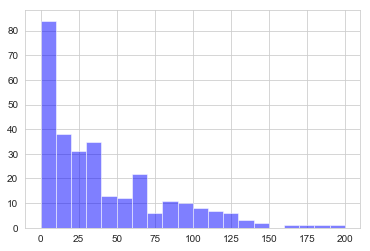

In [35]:
num_bins = 20
n, bins, patches = plt.hist(df["Runs"], num_bins, facecolor='blue', alpha=0.5, align='mid', orientation='vertical')
plt.show()

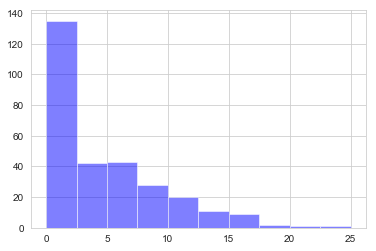

In [36]:
plt.hist(df["4s"], facecolor='blue', alpha=0.5, align='mid', orientation='vertical')
plt.show()

### Number of Fours
* ### Plot a histogram of the number of 4s hit by Tendulkar. What is the most common value of the variable X, where X represents the number of 4s hit by him?

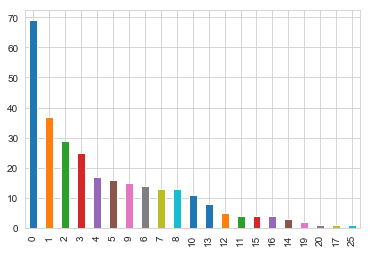

In [37]:
df['4s'].value_counts().plot.bar()

In [42]:
df['4s'].median()

3.0

In [ ]:
### if the value is not available , lets say its Nan then median avoids it and doesnt consider it to be 0

In [79]:
a=[32,36,22,0,42,0,25]

In [80]:
b=[32,36,22,42,25]

In [81]:
import statistics

In [82]:
print(statistics.median(a))

25


In [83]:
print(statistics.median(b))

32


In [107]:
d=[5,9,15,12,13,2,4,7,6,14,11,12]

In [108]:
print(statistics.median(d))

10.0


In [109]:
print(statistics.mean(d))

9.166666666666666


In [110]:
print(statistics.stdev(d))

4.281744192888376


In [127]:
p = np.array([5,9,15,12,13,2,4,7,6,14,11,12])


In [128]:
pr = np.percentile(p, 75) # return 50th percentile, e.g median.
print(pr)

12.25


In [129]:
news=pd.read_csv("popularity.csv", encoding = 'ISO-8859-1')

In [144]:
news[' num_keywords'].mode()

0    7
dtype: int64

In [147]:
news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [149]:
news[' shares'].mean()

3395.3801836343455

In [150]:
news[' shares'].median()

1400.0

In [159]:
sharesabv10k=news[news[' shares']>10000]

In [162]:
sharesabv10k[" shares"].count()

2185

In [169]:
sharesbel2k = news[news[' shares']<8000]

In [170]:
sharesbel2k[" shares"].count()

36719

In [166]:
news[' shares'].count()

39644

In [217]:
news[' shares'].quantile([.25, .50,.75,.78,.80,.85,.90,.92,.95,.97,.98,.99,.996,.999,1])

0.250       946.0
0.500      1400.0
0.750      2800.0
0.780      3100.0
0.800      3400.0
0.850      4400.0
0.900      6200.0
0.920      7500.0
0.950     10800.0
0.970     15700.0
0.980     20500.0
0.990     31657.0
0.996     56500.0
0.999    112992.7
1.000    843300.0
Name:  shares, dtype: float64

In [205]:
news[news[' shares']>400000].count()

url                               6
 timedelta                        6
 n_tokens_title                   6
 n_tokens_content                 6
 n_unique_tokens                  6
 n_non_stop_words                 6
 n_non_stop_unique_tokens         6
 num_hrefs                        6
 num_self_hrefs                   6
 num_imgs                         6
 num_videos                       6
 average_token_length             6
 num_keywords                     6
 data_channel_is_lifestyle        6
 data_channel_is_entertainment    6
 data_channel_is_bus              6
 data_channel_is_socmed           6
 data_channel_is_tech             6
 data_channel_is_world            6
 kw_min_min                       6
 kw_max_min                       6
 kw_avg_min                       6
 kw_min_max                       6
 kw_max_max                       6
 kw_avg_max                       6
 kw_min_avg                       6
 kw_max_avg                       6
 kw_avg_avg                 

In [196]:
(2185/39644)*100

5.5115528200988795

In [209]:
843300/1400

602.3571428571429

In [213]:
news[" shares"].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [216]:
news[" shares"].sort_values(ascending=False)

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
16009    441000
18788    310800
4506     306100
16113    298400
35256    284700
14757    233400
3043     227300
37590    211600
9853     210300
18488    208300
17020    205600
37873    200100
18037    197600
9575     196700
18055    193400
17267    180600
36995    161600
16989    158900
23585    145500
25008    144900
3139     144400
12072    143100
23514    141400
16642    139600
18850    139500
          ...  
36421        54
37828        53
38730        52
9369         51
32900        50
38890        50
31780        49
32443        49
10368        49
33365        48
9671         48
8245         47
9307         45
30295        44
36416        43
27070        43
10378        42
38570        42
7958         41
35193        36
28694        35
34453        28
35327        28
9707         23
18957        22
34398        22
9771          8
38633         5
4709          4
17266         1
Name:  shares, Length: 3

In [220]:
news[' shares'].quantile([.78])

0.78    3100.0
Name:  shares, dtype: float64

In [221]:
remoutliers= news[news[' shares']<=10800]

In [225]:
news[" shares"].count()

39644

In [226]:
37663/39644

0.950030269397639

In [227]:
remoutliers[" shares"].mean()

 timedelta                           354.205427
 n_tokens_title                       10.394658
 n_tokens_content                    547.993601
 n_unique_tokens                       0.549110
 n_non_stop_words                      0.998858
 n_non_stop_unique_tokens              0.690760
 num_hrefs                            10.747259
 num_self_hrefs                        3.301967
 num_imgs                              4.437405
 num_videos                            1.214216
 average_token_length                  4.553699
 num_keywords                          7.215596
 data_channel_is_lifestyle             0.052253
 data_channel_is_entertainment         0.178053
 data_channel_is_bus                   0.161564
 data_channel_is_socmed                0.058439
 data_channel_is_tech                  0.187744
 data_channel_is_world                 0.217853
 kw_min_min                           26.174336
 kw_max_min                         1127.462820
 kw_avg_min                          308

In [228]:
remoutliers[" shares"].mean()

2074.334386533202

In [231]:
remoutliers.std()

 timedelta                           214.867086
 n_tokens_title                        2.112319
 n_tokens_content                    467.255173
 n_unique_tokens                       3.611926
 n_non_stop_words                      5.366809
 n_non_stop_unique_tokens              3.349307
 num_hrefs                            11.127499
 num_self_hrefs                        3.855264
 num_imgs                              8.203935
 num_videos                            4.011003
 average_token_length                  0.831618
 num_keywords                          1.914392
 data_channel_is_lifestyle             0.222539
 data_channel_is_entertainment         0.382562
 data_channel_is_bus                   0.368056
 data_channel_is_socmed                0.234575
 data_channel_is_tech                  0.390513
 data_channel_is_world                 0.412792
 kw_min_min                           69.710443
 kw_max_min                         3457.821157
 kw_avg_min                          553

In [232]:
remoutliers[" shares"].std()

1871.8141388442016

## Data SourciNG

### local Maxima

In [3]:
import ast,sys
import numpy as np
from scipy.signal import argrelextrema


In [9]:

input_list = [3,8,99,9,7,4,3,77,0,2,3,4,5]
A3=np.array(input_list)
maximas=argrelextrema(A3, np.greater)[0]
maximas=[int(x) for x in maximas]
print(maximas)

[2, 7]


In [4]:
input_list.index(maximas[0])

9

In [5]:
m=argrelextrema(A3, np.greater)


In [6]:
a = np.array([1, 2, 3])   # Create a rank 1 array
            # Prints "(3,)"
print(a[0:3])   # Prints "1 2 3"
              

[1 2 3]


In [7]:
a

array([1, 2, 3])

In [8]:
print(m[0])

[2 7]


In [9]:
argrelextrema(A3, np.greater)[0]

array([2, 7], dtype=int64)

#### or local maxima as solved in coding sample solution (the right way)

In [10]:
import ast,sys
import numpy as np

input_list = [3,8,99,9,7,4,3,77,0,2,3,4,5]
diffArray=np.diff(np.sign(np.diff(input_list)))
maximas=list(np.where(diffArray == -2)[0] + 1)
maximas=[int(x) for x in maximas]
print(maximas)


[2, 7]


In [11]:
#below is an alternate approach
#from scipy.signal import argrelextrema
#maximas=argrelextrema(ser.values, np.greater)[0]

### longest alphabetical substring

In [22]:
actual_string = 'efghibncvdhLmnop'
strlist = []
i = 0
while i < len(actual_string.casefold())-1:
    substr = ''
    while actual_string[i + 1].casefold() >= actual_string[i].casefold() :
        substr += actual_string[i].casefold()
        i += 1
        if i > len(actual_string.casefold())-2:
            break
    substr += actual_string[i].casefold()
    i += 1
    strlist.append(substr)
print(max(strlist, key=len))

dhlmnop


In [24]:
string='efghibncvdhkLmnop'
prevChar = ""
curr_longest = ""
longest = ""

for char in string.casefold():
    if prevChar <= char:
        curr_longest += char
        if len(curr_longest) > len(longest):
            longest= curr_longest
    else:
        curr_longest = char
    prevChar = char
print( longest )

dhklmnop


In [ ]:
#wordchecker in string
def stringcheck(st):
    word=input("enter word to be checked in string")
    if word.casefold() in st.casefold():
        return True
    else:
        return False
stringcheck("hey how are you Dog")

In [113]:

def countword(st):
    word=input("enter word to be checked in string\n")
    if word in st:
        return st.count(word)
    else:
        return "word not found"
countword(input())

 hey how
enter word to be checked in string
 is


'word not found'

## Data cleaning 

Given a dataframe, you have to group it by given column name(list of column names). After that you should print data of the group with a specified column value(values). 
The input will contain two lines. First line will have a list of columns and second will have a list of values.
The output should have the first five rows of the corresponding group.(there can be less than five rows in a group too)


In [10]:
df=pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/8NMooe4G0ENEe8z9q5ZvaZA7/googleplaystore.csv')

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
df[df['Installs'].str.contains("Free")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
df=df[~df['Installs'].str.contains("Free")]

In [20]:
df[df['Installs'].str.contains("Free")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [23]:
df['Installs'] = df['Installs'].str.replace(',', '')


In [25]:
df['Installs'] = df['Installs'].str.replace('+', '')


In [26]:

df['Installs'] = df['Installs'].astype(int)#add your cleaning code here


In [27]:
print(df.corr())

            Rating  Installs
Rating    1.000000  0.051355
Installs  0.051355  1.000000


In [6]:
import pandas as pd
dff=pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/wkyk2AWYdJbqgXoRo3Y8w42nX/test.csv')

In [16]:
input_list = [['Pclass','Age'],[3,13]]
cols=input_list[0]#the columns to group the dataframe by
values=input_list[1]# The group to print
pclasdf=dff.groupby(cols)

In [17]:
print(dff[(dff["Pclass"]==3) & (dff["Age"]==13)])

     PassengerId  Pclass                           Name   Sex   Age  SibSp  \
154         1046       3   Asplund, Master. Filip Oscar  male  13.0      4   
392         1284       3  Abbott, Master. Eugene Joseph  male  13.0      0   

     Parch     Ticket     Fare Cabin Embarked  
154      2     347077  31.3875   NaN        S  
392      2  C.A. 2673  20.2500   NaN        S  


In [18]:
c=dff.groupby(cols)

In [19]:
c.size().unstack()

Age,0.17,0.33,0.75,0.83,0.92,1.0,2.0,3.0,5.0,6.0,...,58.0,59.0,60.0,60.5,61.0,62.0,63.0,64.0,67.0,76.0
Pclass,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,2.0,NaN,1.0,NaN,1.0,3.0,1.0,1.0
2,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


## Correct approach

In [20]:
cols=input_list[0]
values=input_list[1]
df=pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/wkyk2AWYdJbqgXoRo3Y8w42nX/test.csv')
print(df.groupby(cols).get_group(tuple(values)).head())

     PassengerId  Pclass                           Name   Sex   Age  SibSp  \
154         1046       3   Asplund, Master. Filip Oscar  male  13.0      4   
392         1284       3  Abbott, Master. Eugene Joseph  male  13.0      0   

     Parch     Ticket     Fare Cabin Embarked  
154      2     347077  31.3875   NaN        S  
392      2  C.A. 2673  20.2500   NaN        S  


## groupby only non numeric values clolumns from the dataframe...Given a dataframe, you have to group it by all non-numeric columns(numeric columns would be float and int) and print the resulting dataframe aggregated by averages.

In [70]:
dfa=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/E4QbGd18ORJpbZZkndZ5bdKBn/googleplaystore_user_reviews.csv")


In [71]:
dfa.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### incorrect approach of manually checking which are non numeric

In [81]:
print(dfa.groupby(["App","Translated_Review","Sentiment"]).mean().head(5))

                                                                        Sentiment_Polarity  \
App                   Translated_Review                      Sentiment                       
10 Best Foods for You 10 best foods 4u Excellent chose foods Positive                 1.00   
                      A big thanks ds I got bst gd health    Positive                 0.10   
                      Absolutely Fabulous Phenomenal         Positive                 0.45   
                      Amazing                                Positive                 0.60   
                      An excellent A useful                  Positive                 0.65   

                                                                        Sentiment_Subjectivity  
App                   Translated_Review                      Sentiment                          
10 Best Foods for You 10 best foods 4u Excellent chose foods Positive                     0.65  
                      A big thanks ds I got bst gd

## correct approach to find out numeric and non numeric VERY USEFUL FOR SELECTING NON NUMERIC COLUMNS


In [149]:
import pandas as pd 
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/E4QbGd18ORJpbZZkndZ5bdKBn/googleplaystore_user_reviews.csv")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols = list(df.select_dtypes(exclude=numerics).columns)
print(df.groupby(cols).agg('mean').head())

                                                                        Sentiment_Polarity  \
App                   Translated_Review                      Sentiment                       
10 Best Foods for You 10 best foods 4u Excellent chose foods Positive                 1.00   
                      A big thanks ds I got bst gd health    Positive                 0.10   
                      Absolutely Fabulous Phenomenal         Positive                 0.45   
                      Amazing                                Positive                 0.60   
                      An excellent A useful                  Positive                 0.65   

                                                                        Sentiment_Subjectivity  
App                   Translated_Review                      Sentiment                          
10 Best Foods for You 10 best foods 4u Excellent chose foods Positive                     0.65  
                      A big thanks ds I got bst gd

### Given a dataframe, you have to group it by given column name(list of column names). After that you should print data of the group with a specified column value(values). 

## SEGMENTED UNIVARIATE ANALYSIS

In [14]:
import pandas as pd
cendf= pd.read_csv("./Course 1- Statistics & Eda/Exploratory Data Analysis/Segment Univariate Analysis/EDA_census.csv")

In [15]:
cendf.head()

,Table Name,State Code,Distt. Code,Area Name,Total/Rural/Urban,Age-group,Persons,Males,Females,illiterates,illiterateM,illiterateF,literates,literateM,literateF
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,188506636,258709529,763638812,434763622,328875190
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,85752254,78762999,0,0,0
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,3388683,3359531,18078426,9514681,8563745
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,2013742,2117672,22836959,12048195,10788764
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,1198339,1293565,20932734,11016646,9916088


#### What percentage of females in the age group 20-24 are illiterate in India, i.e. out of all the females in the age group 20-24, what fraction is illiterate?

In [27]:
lf=cendf[(cendf["Age-group"]=="20-24") & (cendf["Total/Rural/Urban"]=="Total") & (cendf["Area Name"]=="INDIA")]

In [28]:
lf

,Table Name,State Code,Distt. Code,Area Name,Total/Rural/Urban,Age-group,Persons,Males,Females,illiterates,illiterateM,illiterateF,literates,literateM,literateF
15,C2308,0,0,INDIA,Total,20-24,111424222,57584693,53839529,18679492,6467026,12212466,92744730,51117667,41627063


In [32]:
(lf.illiterateF/lf.Females)*100

15    22.683085
dtype: float64

In [42]:
litrate=cendf[(cendf["Total/Rural/Urban"] == 'Total') & (cendf["Area Name"] == 'INDIA') ].groupby("Age-group").mean()

In [67]:
literacyrate=(litrate.literates/litrate.Persons)*100
literacyrate


Age-group
0-6                0.000000
10                88.693071
11                91.962826
12                91.421234
13                92.543554
14                91.682750
15                89.961344
16                89.783437
17                90.392562
18                86.665872
19                87.637647
20-24             83.235699
25-29             77.681141
30-34             72.538435
35-39             67.274016
40-44             62.993414
45-49             59.758607
50-54             57.565672
55-59             54.830491
60-64             46.926523
65-69             43.943993
7                 72.818658
70-74             39.774485
75-79             41.931327
8                 84.680522
80+               38.963204
9                 89.362038
Age not stated    64.559417
All ages          63.066084
dtype: float64

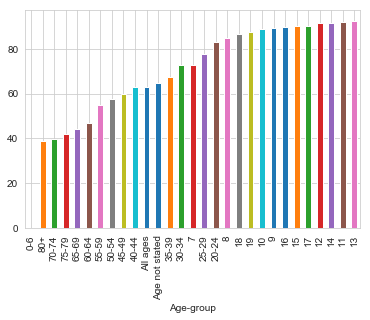

In [81]:
literacyrate.sort_values().plot(kind="bar")

### Which state shows the highest female literacy rate?

In [71]:
statewiselitrate=cendf[(cendf["Age-group"]=="All ages") & (cendf["Total/Rural/Urban"]=="Total") & (cendf["Area Name"]!="INDIA")]
statewiselitrate.head(3)

,Table Name,State Code,Distt. Code,Area Name,Total/Rural/Urban,Age-group,Persons,Males,Females,illiterates,illiterateM,illiterateF,literates,literateM,literateF
87,C2308,1,0,State - JAMMU & KASHMIR,Total,All ages,12541302,6640662,5900640,5474069,2375991,3098078,7067233,4264671,2802562
174,C2308,2,0,State - HIMACHAL PRADESH,Total,All ages,6864602,3481873,3382729,1824866,729283,1095583,5039736,2752590,2287146
261,C2308,3,0,State - PUNJAB,Total,All ages,27743338,14639465,13103873,9036201,4203409,4832792,18707137,10436056,8271081


In [69]:
statewiselitrate.groupby("Area Name").mean()

,State Code,Distt. Code,Persons,Males,Females,illiterates,illiterateM,illiterateF,literates,literateM,literateF
Area Name,,,,,,,,,,,
State - ANDAMAN & NICOBAR ISLANDS,35,0,380581,202871,177710,86300,38494,47806,294281,164377,129904
State - ANDHRA PRADESH,28,0,84580777,42442146,42138631,34024017,14190903,19833114,50556760,28251243,22305517
State - ARUNACHAL PRADESH,12,0,1383727,713912,669815,617722,274044,343678,766005,439868,326137
State - ASSAM,18,0,31205576,15939443,15266133,12027599,5370804,6656795,19177977,10568639,8609338
State - BIHAR,10,0,104099452,54278157,49821295,51594899,22670134,28924765,52504553,31608023,20896530
State - CHANDIGARH,4,0,1055450,580663,474787,250012,115317,134695,805438,465346,340092
State - CHHATTISGARH,22,0,25545198,12832895,12712303,10165276,4025002,6140274,15379922,8807893,6572029
State - DADRA & NAGAR HAVELI,26,0,343709,193760,149949,120479,51239,69240,223230,142521,80709
State - DAMAN & DIU,25,0,243247,150301,92946,54841,25658,29183,188406,124643,63763


In [72]:
statelitrate =statewiselitrate.groupby("Area Name").mean()

In [80]:
femlitrate=(statelitrate.literateF/statelitrate.Females)*100
femlitrate.sort_values()

Area Name
State - BIHAR                        41.942968
State - RAJASTHAN                    44.206066
State - JHARKHAND                    46.367131
State - JAMMU & KASHMIR              47.495899
State - UTTAR PRADESH                48.423061
State - ARUNACHAL PRADESH            48.690609
State - MADHYA PRADESH               50.484341
State - CHHATTISGARH                 51.698178
State - ANDHRA PRADESH               52.933654
State - DADRA & NAGAR HAVELI         53.824300
State - ODISHA                       56.125942
State - ASSAM                        56.395015
State - HARYANA                      57.392908
State - MEGHALAYA                    59.057108
State - KARNATAKA                    60.204679
State - GUJARAT                      60.861621
State - UTTARAKHAND                  60.972687
State - MANIPUR                      61.290791
State - WEST BENGAL                  62.337050
State - PUNJAB                       63.119362
State - NAGALAND                     64.839865
Sta

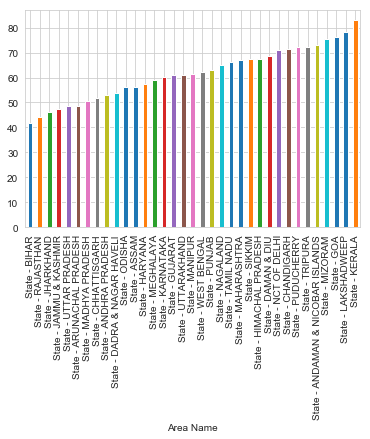

In [78]:
femlitrate.sort_values().plot(kind="bar")

In [87]:
litrate=(statelitrate.literates/statelitrate.Persons)*100

In [88]:
litrate.sort_values()

Area Name
State - BIHAR                        50.436916
State - ARUNACHAL PRADESH            55.358102
State - JHARKHAND                    55.559581
State - RAJASTHAN                    55.836841
State - JAMMU & KASHMIR              56.351669
State - UTTAR PRADESH                57.252497
State - MADHYA PRADESH               59.001861
State - ANDHRA PRADESH               59.773345
State - MEGHALAYA                    60.164199
State - CHHATTISGARH                 60.206705
State - ASSAM                        61.456892
State - ODISHA                       63.711955
State - DADRA & NAGAR HAVELI         64.947383
State - HARYANA                      65.475466
State - KARNATAKA                    66.531016
State - MANIPUR                      66.828210
State - WEST BENGAL                  67.419917
State - PUNJAB                       67.429294
State - NAGALAND                     67.851031
State - GUJARAT                      67.990681
State - UTTARAKHAND                  68.220839
Sta

In [166]:
import datetime

In [168]:
df = pd.read_csv("D:/upgrap/Course 1- Statistics & Eda/Exploratory Data Analysis/Bivariate Analysis/EDA_Gold_Silver_prices.csv")


In [171]:
df["dt"] = '1-' + df.Month.astype(str)


In [172]:
df['dt']= pd.to_datetime(df['dt'])


In [180]:
df2008 = df[df.dt.dt.year == 2008]
df2008

,Month,SilverPrice,GoldPrice,dt


In [177]:
df2008.GoldPrice.corr(df2008.SilverPrice, method = 'pearson')

nan

In [6]:
goldsil = pd.read_csv("D:/upgrap/Course 1- Statistics & Eda/Exploratory Data Analysis/Bivariate Analysis/EDA_Gold_Silver_prices.csv")

In [8]:
goldsil.to_excel("Gold_Silver_prices.xlsx")

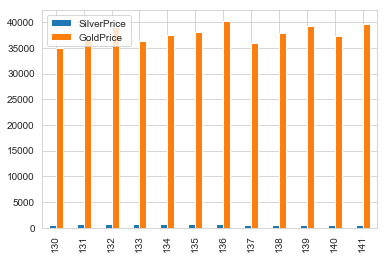

In [18]:
goldsil.iloc[130:142].plot(kind="bar")

In [15]:
goldsil[goldsil.Month=="Jan-08"]

,Month,SilverPrice,GoldPrice
130,Jan-08,632.29,35025.78


In [19]:
goldsil.iloc[130:142]

,Month,SilverPrice,GoldPrice
130,Jan-08,632.29,35025.78
131,Feb-08,701.87,36642.46
132,Mar-08,775.49,39082.77
133,Apr-08,700.96,36416.00
134,May-08,718.20,37435.38
135,Jun-08,729.63,38087.88
136,Jul-08,773.80,40256.56
137,Aug-08,625.97,36026.85
138,Sep-08,555.58,37815.02
139,Oct-08,507.20,39235.79


### CORRELATION - BIVARIATE ANALYSIS

In [20]:
cur=pd.read_excel("D:/upgrap/Course 1- Statistics & Eda/Exploratory Data Analysis/Bivariate Analysis/currencies.xlsx")

In [29]:
cur.columns

Index(['Currency', 'Chinese Yuan', 'Euro', 'Japanese Yen',
       'U.K. Pound Sterling', 'U.S. Dollar', 'Algerian Dinar',
       'Australian Dollar', 'Bahrain Dinar', 'Botswana Pula', 'Brazilian Real',
       'Brunei Dollar', 'Canadian Dollar', 'Chilean Peso', 'Colombian Peso',
       'Czech Koruna', 'Danish Krone', 'Hungarian Forint', 'Icelandic Krona',
       'Indian Rupee', 'Indonesian Rupiah', 'Iranian Rial',
       'Israeli New Sheqel', 'Kazakhstani Tenge', 'Korean Won',
       'Kuwaiti Dinar', 'Libyan Dinar', 'Malaysian Ringgit', 'Mauritian Rupee',
       'Mexican Peso', 'Nepalese Rupee', 'New Zealand Dollar',
       'Norwegian Krone', 'Rial Omani', 'Pakistani Rupee', 'Nuevo Sol',
       'Philippine Peso', 'Polish Zloty', 'Qatar Riyal', 'Russian Ruble',
       'Saudi Arabian Riyal', 'Singapore Dollar', 'South African Rand',
       'Sri Lanka Rupee', 'Swedish Krona', 'Swiss Franc', 'Thai Baht',
       'Trinidad And Tobago Dollar', 'Tunisian Dinar', 'U.A.E. Dirham',
       'Peso Ur

In [9]:
#cur.set_index("Currency", inplace=True)

In [36]:
cur

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,2016-07-01,9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,2016-07-05,9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,2016-07-06,9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,2016-07-07,9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,2016-07-08,9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909
5,2016-07-11,9.29403,1.25769,139.962,1.07050,1.38962,153.742,1.83836,0.522496,15.0067,...,20.0773,201.842,11.9439,1.36641,48.7950,9.23745,3.07068,5.10337,NaN,13.8614
6,2016-07-12,9.31021,1.25490,143.369,1.05762,1.39194,153.869,1.83439,0.523368,14.9510,...,19.9238,202.179,11.8614,1.36674,48.9182,9.28617,3.07901,5.11187,NaN,13.8845
7,2016-07-13,9.31350,1.25716,145.178,1.04680,1.39193,153.855,1.83101,0.523366,14.9509,...,19.9273,202.175,11.9234,1.37063,48.9958,9.29005,3.06884,5.11187,42.1644,13.8845
8,2016-07-14,9.30432,1.24695,144.895,1.05236,1.39122,153.763,1.82791,0.523097,14.9112,...,19.8519,202.074,11.8098,1.36326,48.8873,9.29990,NaN,5.10926,NaN,13.8774
9,2016-07-15,9.31532,1.25263,147.268,1.04242,1.39392,NaN,1.82786,0.524115,14.9723,...,20.0040,202.467,11.8409,1.36451,48.7607,9.31437,NaN,5.11917,42.0267,13.9044


In [30]:
cur.loc[0:, ['Indian Rupee','Euro', 'Japanese Yen','Australian Dollar','U.S. Dollar']]

,Indian Rupee,Euro,Japanese Yen,Australian Dollar,U.S. Dollar
0,94.1451,1.25367,143.645,1.87126,1.39596
1,94.1513,1.25322,142.715,1.85825,1.39684
2,NaN,1.25834,140.540,1.87313,1.39286
3,94.0345,1.25737,140.640,1.85236,1.39316
4,93.9408,1.25797,140.510,1.85974,1.39257
5,93.3027,1.25769,139.962,1.83836,1.38962
6,93.4641,1.25490,143.369,1.83439,1.39194
7,93.5445,1.25716,145.178,1.83101,1.39193
8,93.0917,1.24695,144.895,1.82791,1.39122
9,NaN,1.25263,147.268,1.82786,1.39392


In [35]:
import matplotlib.pyplot as plt


In [45]:
cur.loc[0:, ['Indian Rupee','Euro', 'Japanese Yen','Australian Dollar','U.S. Dollar']]

,Indian Rupee,Euro,Japanese Yen,Australian Dollar,U.S. Dollar
0,94.1451,1.25367,143.645,1.87126,1.39596
1,94.1513,1.25322,142.715,1.85825,1.39684
2,NaN,1.25834,140.540,1.87313,1.39286
3,94.0345,1.25737,140.640,1.85236,1.39316
4,93.9408,1.25797,140.510,1.85974,1.39257
5,93.3027,1.25769,139.962,1.83836,1.38962
6,93.4641,1.25490,143.369,1.83439,1.39194
7,93.5445,1.25716,145.178,1.83101,1.39193
8,93.0917,1.24695,144.895,1.82791,1.39122
9,NaN,1.25263,147.268,1.82786,1.39392


In [34]:
corr = cur.loc[0:, ['Indian Rupee','Euro', 'Japanese Yen','Australian Dollar','U.S. Dollar']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Indian Rupee,Euro,Japanese Yen,Australian Dollar,U.S. Dollar
Indian Rupee,1,0.243851,-0.270123,0.921475,0.872862
Euro,0.243851,1,-0.645719,0.331588,-0.210587
Japanese Yen,-0.270123,-0.645719,1,-0.582032,0.210295
Australian Dollar,0.921475,0.331588,-0.582032,1,0.60701
U.S. Dollar,0.872862,-0.210587,0.210295,0.60701,1


In [37]:
currency=cur.set_index("Currency")

In [56]:
currency.iloc[:,[18,33]]

,Indian Rupee,Pakistani Rupee
Currency,,
2016-07-01,94.1451,NaN
2016-07-05,94.1513,NaN
2016-07-06,NaN,NaN
2016-07-07,94.0345,NaN
2016-07-08,93.9408,NaN
2016-07-11,93.3027,145.722
2016-07-12,93.4641,145.919
2016-07-13,93.5445,145.952
2016-07-14,93.0917,NaN


In [53]:
correl=currency.iloc[:,18:].corr()
correl.style.background_gradient(cmap='coolwarm')

C:\Users\NAVARCH\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Indian Rupee,Indonesian Rupiah,Iranian Rial,Israeli New Sheqel,Kazakhstani Tenge,Korean Won,Kuwaiti Dinar,Libyan Dinar,Malaysian Ringgit,Mauritian Rupee,Mexican Peso,Nepalese Rupee,New Zealand Dollar,Norwegian Krone,Rial Omani,Pakistani Rupee,Nuevo Sol,Philippine Peso,Polish Zloty,Qatar Riyal,Russian Ruble,Saudi Arabian Riyal,Singapore Dollar,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Indian Rupee,1,0.907353,0.784995,0.518196,-0.0747994,0.648851,0.931099,-3.98036e-15,0.840498,0.835943,0.657036,0.897655,0.444635,-0.0196818,0.873151,0.991673,0.877833,-0.0574452,0.474792,0.873075,0.790276,0.873101,0.798249,0.897567,0.872443,-0.186991,-0.655866,0.868087,-0.186861,-0.618041,0.872859,0.758479,0.87317
Indonesian Rupiah,0.907353,1,0.324076,0.0342413,0.577092,0.471717,0.911001,-8.46412e-15,0.808295,0.781632,-0.302905,0.839822,0.415928,-0.296333,0.781213,0.400369,0.965297,0.144698,-0.289656,0.781027,0.559801,0.78104,0.698221,0.797556,0.781726,-0.376247,-0.574851,0.16237,0.035303,-0.344239,0.780833,-1,0.780367
Iranian Rial,0.784995,0.324076,1,0.381403,0.0716088,0.220193,0.633163,-1.06792e-13,0.666121,0.889337,0.541518,0.580461,0.0877626,-0.726103,0.92598,0.887756,0.956587,0.392696,0.275931,0.925993,0.536768,0.925945,0.898149,0.603327,0.925888,-0.729452,-0.519679,0.97538,0.356393,0.275844,0.92611,1,0.926207
Israeli New Sheqel,0.518196,0.0342413,0.381403,1,-0.559463,0.624076,-0.210192,nan,0.752441,0.374247,0.679269,0.548069,-0.0235537,0.596162,0.164557,-0.172746,0.514908,-0.104352,0.943899,0.164209,0.841512,0.16381,0.573744,0.740165,0.172577,0.384179,-0.18897,0.743116,-0.750277,0.662176,0.163922,0.685225,0.164093
Kazakhstani Tenge,-0.0747994,0.577092,0.0716088,-0.559463,1,-0.254087,0.626637,-1.10406e-14,-0.104498,0.117008,-0.665511,-0.0645486,-0.160653,-0.618358,0.238584,0.917242,-0.102193,0.510542,-0.693138,0.238691,-0.120687,0.23858,-0.479244,-0.187091,0.243827,-0.368456,0.0399753,-0.695504,0.49594,-0.952387,0.238915,-0.484516,0.23839
Korean Won,0.648851,0.471717,0.220193,0.624076,-0.254087,1,0.250499,nan,0.623704,0.66759,0.47851,0.791375,-0.107079,0.336879,0.405822,0.221954,0.574824,0.108427,0.541216,0.405527,0.771639,0.405938,0.459155,0.629736,0.402847,0.483744,-0.368727,0.459805,-0.580974,-0.144048,0.405514,0.282658,0.405558
Kuwaiti Dinar,0.931099,0.911001,0.633163,-0.210192,0.626637,0.250499,1,-2.98e-14,0.692355,0.783607,-0.0505434,0.636121,0.633182,-0.496269,0.902428,0.808196,1,0.3395,-0.550788,0.902388,0.288145,0.902131,0.701914,0.694096,0.902473,-0.503132,-0.656913,0.0388206,0.396316,-0.44826,0.902113,nan,0.902138
Libyan Dinar,-3.98036e-15,-8.46412e-15,-1.06792e-13,nan,-1.10406e-14,nan,-2.98e-14,nan,5.8019e-15,-2.46429e-14,nan,nan,nan,nan,nan,nan,-2.19521e-14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.8696e-14,nan,nan,nan,-1.17993e-14,nan
Malaysian Ringgit,0.840498,0.808295,0.666121,0.752441,-0.104498,0.623704,0.692355,5.8019e-15,1,0.528377,0.590176,0.728725,-0.0631342,0.350714,0.470363,-0.199978,0.399233,-0.0834805,0.649809,0.470117,0.770394,0.470266,0.768575,0.913482,0.470085,0.151864,-0.327292,0.772498,-0.472334,-0.830232,0.470437,0.391256,0.469962
Mauritian Rupee,0.835943,0.781632,0.889337,0.374247,0.117008,0.66759,0.783607,-2.46429e-14,0.528377,1,0.421257,0.840531,0.186705,-0.410991,0.946447,0.970337,0.931935,0.339314,0.246061,0.94637,0.808975,0.94646,0.755778,0.670077,0.945902,-0.585515,-0.666531,0.842505,0.0638049,-0.328348,0.946318,0.958553,0.946419


In [58]:
corr = cur.loc[0:, ['Indian Rupee','Euro', 'Japanese Yen','Australian Dollar','U.S. Dollar','Chinese Yuan','U.K. Pound Sterling']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Indian Rupee,Euro,Japanese Yen,Australian Dollar,U.S. Dollar,Chinese Yuan,U.K. Pound Sterling
Indian Rupee,1,0.243851,-0.270123,0.921475,0.872862,0.30405,0.314681
Euro,0.243851,1,-0.645719,0.331588,-0.210587,0.151596,0.53115
Japanese Yen,-0.270123,-0.645719,1,-0.582032,0.210295,0.117566,-0.970308
Australian Dollar,0.921475,0.331588,-0.582032,1,0.60701,0.0779829,0.579213
U.S. Dollar,0.872862,-0.210587,0.210295,0.60701,1,0.291582,-0.0423027
Chinese Yuan,0.30405,0.151596,0.117566,0.0779829,0.291582,1,0.108695
U.K. Pound Sterling,0.314681,0.53115,-0.970308,0.579213,-0.0423027,0.108695,1


### National achievement survey

### You want to understand the distribution of two variables — mother’s education and the number of siblings. Complete the following statement:

 

Most children whose mothers are illiterate have , how many siblings:

In [68]:
nas=pd.read_excel("D:/upgrap/Course 1- Statistics & Eda/Exploratory Data Analysis/Bivariate Analysis/nationalachievementsurvey.xlsx")
nas.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [281]:
correl=nas[["Siblings","Mother.edu"]]

In [88]:
nas[nas["Mother.edu"]=="Illiterate"].head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN
5,26011001006,Maharashtra,1,Girl,13 years,3.0,2.0,2 siblings,No,Primary,...,Agree,Every day,Once a week,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [124]:
k=nas.groupby(["Siblings","Mother.edu"])
k[["Siblings","Mother.edu"]].count()

Siblings  Mother.edu
Siblings     Mother.edu                          
1 sibling    Degree & above        88          88
             Illiterate           533         533
             Primary              689         689
             Secondary           1050        1050
             Sr secondary         206         206
2 siblings   Degree & above        36          36
             Illiterate           923         923
             Primary              771         771
             Secondary            846         846
             Sr secondary         132         132
3 siblings   Degree & above        11          11
             Illiterate           532         532
             Primary              417         417
             Secondary            348         348
             Sr secondary          48          48
4+ siblings  Degree & above         6           6
             Illiterate           469         469
             Primary              251         251
             Secondary            255         255
             Sr secondary          23          23
Single child Degree & above        20          20
             Illiterate            88          88
             Primary               92          92
             Secondary             92          92
             Sr secondary          24          24

In [117]:
biv=nas[(nas["Siblings"]!="4+ siblings") & (nas["Mother.edu"]=="Illiterate")]

In [125]:
L=nas.groupby(["Age","Father.edu"])

In [139]:
L["Science.."].mean()

Age        Father.edu    
11- years  Illiterate              NaN
           Primary           48.486667
           Secondary         29.696667
           Sr secondary            NaN
12 years   Degree & above    46.752857
           Illiterate        29.870000
           Primary           34.121667
           Secondary         33.593810
           Sr secondary      40.113750
13 years   Degree & above    44.805143
           Illiterate        33.758968
           Primary           37.617555
           Secondary         38.164402
           Sr secondary      39.046503
14 years   Degree & above    42.676944
           Illiterate        35.319478
           Primary           36.700267
           Secondary         36.738859
           Sr secondary      39.050278
15 years   Degree & above    29.090000
           Illiterate        33.413333
           Primary           35.162768
           Secondary         32.872800
           Sr secondary      38.615714
16+ years  Degree & above    32.730000

# DERIVED METRICS

In [144]:
cust_rating = pd.read_csv('https://query.data.world/s/ILc-P4llUraMaYN6N6Bdw7p6kUvHnj')

In [146]:
cust_rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [151]:
round(cust_rating[["rating","food_rating","service_rating"]].mean(axis=1))

0       2.0
1       2.0
2       2.0
3       2.0
4       1.0
5       0.0
6       1.0
7       0.0
8       1.0
9       2.0
10      1.0
11      2.0
12      1.0
13      0.0
14      0.0
15      2.0
16      2.0
17      1.0
18      0.0
19      1.0
20      0.0
21      1.0
22      2.0
23      1.0
24      2.0
25      1.0
26      0.0
27      0.0
28      1.0
29      2.0
       ... 
1224    2.0
1225    1.0
1226    1.0
1227    1.0
1228    1.0
1229    1.0
1230    2.0
1231    2.0
1232    1.0
1233    0.0
1234    1.0
1235    2.0
1236    1.0
1237    1.0
1238    1.0
1239    0.0
1240    0.0
1241    0.0
1242    1.0
1243    1.0
1244    1.0
1245    2.0
1246    1.0
1247    1.0
1248    1.0
1249    1.0
1250    1.0
1251    1.0
1252    1.0
1253    0.0
Length: 1254, dtype: float64

In [152]:
odi=pd.read_excel("D:/upgrap/Course 1- Statistics & Eda/Exploratory Data Analysis/Derived metrics/odi-batting.xlsx")

In [164]:
odi.MatchDate

0                 16-02-2010
1        2009-01-09 00:00:00
2                 16-08-2010
3        2010-10-07 00:00:00
4        2010-01-07 00:00:00
5        2010-07-07 00:00:00
6        2010-09-10 00:00:00
7        2010-09-07 00:00:00
8        2010-05-07 00:00:00
9                 30-08-2009
10                17-08-2010
11       2011-09-08 00:00:00
12       2010-03-07 00:00:00
13       2010-07-10 00:00:00
14       2011-07-08 00:00:00
15                18-02-2010
16       2010-11-10 00:00:00
17       2011-07-08 00:00:00
18                19-04-2009
19       2010-05-07 00:00:00
20       2011-09-08 00:00:00
21       2010-03-07 00:00:00
22       2010-09-10 00:00:00
23       2010-01-07 00:00:00
24       2009-01-09 00:00:00
25                30-08-2009
26                16-02-2010
27       2010-10-07 00:00:00
28       2010-09-07 00:00:00
29                17-08-2010
                ...         
50254             24-10-1999
50255             28-09-1999
50256             17-10-1987
50257    2007-

In [154]:
cen=odi.groupby("Country")
cen[["Country","Runs"]].count()

,Country,Runs
Country,,
Afghanistan,138,138
Australia,5761,5761
Bangladesh,2145,2145
Bermuda,298,298
Canada,603,603
East Africa,26,26
England,4596,4596
Hong Kong,34,34
India,6049,6049


In [162]:
odi[(odi["Country"]=="India") & (odi["Runs"]>=100) ].groupby(["MatchDate","Player"]).count()

,,Country,Runs,Weekday,Ground,Versus,Balls
MatchDate,Player,,,,,,
1984-05-12 00:00:00,Dillip B Vengsarkar,1,1,1,1,1,1
1984-06-10 00:00:00,Ravishankar J Shastri,1,1,1,1,1,1
1986-07-09 00:00:00,Krishnamachari Srikkanth,1,1,1,1,1,1
1986-07-10 00:00:00,Raman Lamba,1,1,1,1,1,1
1990-01-12 00:00:00,Ravishankar J Shastri,1,1,1,1,1,1
1992-11-12 00:00:00,Woorkeri V Raman,1,1,1,1,1,1
1993-04-03 00:00:00,Navjot S Sidhu,1,1,1,1,1,1
1994-07-11 00:00:00,Navjot S Sidhu,1,1,1,1,1,1
1994-09-09 00:00:00,Sachin R Tendulkar,1,1,1,1,1,1


# date time day weekday

In [230]:
import calendar
order = pd.read_csv('https://query.data.world/s/3hIAtsCE7vYkPEL-O5DyWJAeS5Af-7')
order['Order_Date'] = pd.to_datetime(order['Order_Date'])

In [231]:

order['year']  = order['Order_Date'].dt.year

In [232]:
order['month']= order['Order_Date'].dt.month

In [237]:
order['dayofmonth']=order['Order_Date'].dt.day

In [238]:
order['weekday']=order['Order_Date'].dt.weekday

In [239]:
order['dayofweek']=order['Order_Date'].dt.day_name()

In [240]:
print(order.head(10))


   Order_ID Order_Date Order_Priority  Ord_id  year  month  day  dayofweek  \
0         3 2010-10-13            LOW   Ord_1  2010     10   13  Wednesday   
1       293 2012-01-10           HIGH   Ord_2  2012      1   10    Tuesday   
2       483 2011-10-07           HIGH   Ord_3  2011     10    7     Friday   
3       515 2010-08-28  NOT SPECIFIED   Ord_4  2010      8   28   Saturday   
4       613 2011-06-17           HIGH   Ord_5  2011      6   17     Friday   
5       643 2011-03-24           HIGH   Ord_6  2011      3   24   Thursday   
6       678 2010-02-26            LOW   Ord_7  2010      2   26     Friday   
7       807 2010-11-23         MEDIUM   Ord_8  2010     11   23    Tuesday   
8       868 2012-08-06  NOT SPECIFIED   Ord_9  2012      8    6     Monday   
9       933 2012-04-08  NOT SPECIFIED  Ord_10  2012      4    8     Sunday   

   dayofmonth  weekday  
0          13        2  
1          10        1  
2           7        4  
3          28        5  
4          17   

In [249]:
subtime=pd.read_excel("D:/upgrap/Course 1- Statistics & Eda/Exploratory Data Analysis/Derived metrics/upgradedaassignment.xlsx",  sheet_name='Sheet2')

In [250]:
subtime.head()

,submission,upgrad,com,compressedtype,submit_timeDATE,submit_time,MINUTE,SECOND,DAY,Hour,Month,Year,Date
0,https://ckd,upgrad,com/UpGrad/73ba5189-94fd-44aa-88d3-6b36aaa69b0...,zip,2017-01-03,20:28:52,28,52,Tue,20,1,2017,3
1,https://ckd,upgrad,com/UpGrad/185242ff-7508-4cc4-afa3-5865733ba1d...,zip,2017-01-03,20:18:21,18,21,Tue,20,1,2017,3
2,https://ckd,upgrad,com/UpGrad/a353d129-c100-4342-aa95-a7018ff9315...,zip,2017-01-03,22:37:08,37,8,Tue,22,1,2017,3
3,https://ckd,upgrad,com/UpGrad/002fc912-faa1-4948-9358-fcdabfd7669...,zip,2017-01-02,21:43:19,43,19,Mon,21,1,2017,2
4,https://ckd,upgrad,com/UpGrad/25cbc4a4-6d49-4ffa-9bf1-06bdb1a7cf8...,zip,2017-01-03,15:27:49,27,49,Tue,15,1,2017,3


In [260]:
subtime.groupby("submit_timeDATE").count()

,submission,upgrad,com,compressedtype,submit_time,MINUTE,SECOND,DAY,Hour,Month,Year,Date
submit_timeDATE,,,,,,,,,,,,
2016-11-19,1,1,1,1,1,1,1,1,1,1,1,1
2016-12-19,1,1,1,1,1,1,1,1,1,1,1,1
2016-12-21,1,1,1,1,1,1,1,1,1,1,1,1
2016-12-28,2,2,2,2,2,2,2,2,2,2,2,2
2016-12-29,2,2,2,2,2,2,2,2,2,2,2,2
2016-12-30,6,6,6,6,6,6,6,6,6,6,6,6
2016-12-31,1,1,1,1,1,1,1,1,1,1,1,1
2017-01-01,6,6,6,6,6,6,6,6,6,6,6,6
2017-01-02,14,14,14,14,14,14,14,14,14,14,14,14


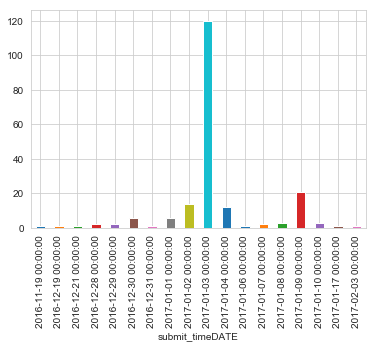

In [258]:
subtime.groupby("submit_timeDATE")["submission"].count().plot(kind="bar")

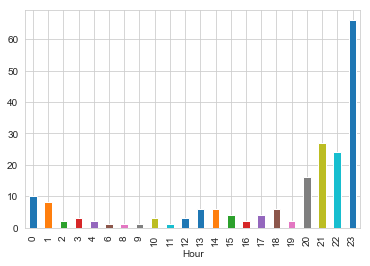

In [261]:
subtime.groupby("Hour")["submission"].count().plot(kind="bar")

In [272]:
subtime[subtime["submit_timeDATE"]>"2017-01-03"].count()

submission         44
upgrad             44
com                44
compressedtype     44
submit_timeDATE    44
submit_time        44
MINUTE             44
SECOND             44
DAY                44
Hour               44
Month              44
Year               44
Date               44
dtype: int64

In [280]:
subtime[subtime["submit_timeDATE"]>"2017-01-03"].groupby("submit_timeDATE").count()

,submission,upgrad,com,compressedtype,submit_time,MINUTE,SECOND,DAY,Hour,Month,Year,Date
submit_timeDATE,,,,,,,,,,,,
2017-01-04,12,12,12,12,12,12,12,12,12,12,12,12
2017-01-06,1,1,1,1,1,1,1,1,1,1,1,1
2017-01-07,2,2,2,2,2,2,2,2,2,2,2,2
2017-01-08,3,3,3,3,3,3,3,3,3,3,3,3
2017-01-09,21,21,21,21,21,21,21,21,21,21,21,21
2017-01-10,3,3,3,3,3,3,3,3,3,3,3,3
2017-01-17,1,1,1,1,1,1,1,1,1,1,1,1
2017-02-03,1,1,1,1,1,1,1,1,1,1,1,1


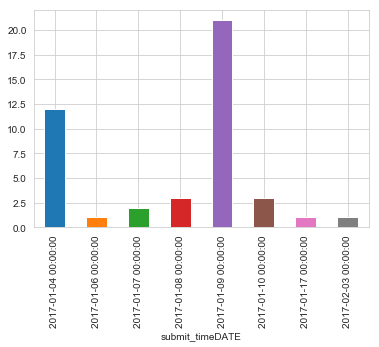

In [277]:
subtime[subtime["submit_timeDATE"]>"2017-01-03"].groupby("submit_timeDATE")["submission"].count().plot(kind="bar")

 ### Bivariate Analysis Coding practice
 
 Check if a given strinf can form palindrome by permutation of its alphabets

In [23]:
string=input()
NO_OF_CHARS = 256
 
def canFormPalindrome(string) : 
  
   
    count = [0] * (NO_OF_CHARS) 
  
    
    for i in range( 0, len(string)) : 
        count[ord(string[i])] = count[ord(string[i])] + 1
  
    odd = 0
      
    for i in range(0, NO_OF_CHARS ) : 
        if (count[i] & 1) : 
            odd = odd + 1
  
        if (odd > 1) : 
            return False
              
    
    return True
  

if(canFormPalindrome(string)) : 
    print("Yes") 
else : 
    print("No") 

 tirtri


Yes


##### Sample solution by console

In [ ]:
string=input()
from collections import Counter 
res = Counter(string) 
count=0
for key in res:
    if (res[key]%2!=0) & (count==1):
        count=2
        break
    if (res[key]%2!=0) & (count==0):
        count=1
if(count>1):
    print('No')
else:
    print('Yes')
    

### Sum of prime numbers from 2 to n

In [31]:
n=int(input())#find the sum of primes from 2 to n 
def sumOfPrimes(n): 
    # list to store prime numbers 
    prime = [True] * (n + 1) 
      
    # Create a boolean array "prime[0..n]" 
    # and initialize all entries it as true. 
    # A value in prime[i] will finally be 
    # false if i is Not a prime, else true. 
      
    p = 2
    while p * p <= n: 
        # If prime[p] is not changed, then 
        # it is a prime 
        if prime[p] == True: 
            # Update all multiples of p 
            i = p * 2
            while i <= n: 
                prime[i] = False
                i += p 
        p += 1    
           
    # Return sum of primes generated through 
    # Sieve. 
    sum = 0
    for i in range (2, n + 1): 
        if(prime[i]): 
            sum += i 
    return sum
sumOfPrimes(n)
    

 5


10

##### Sample Solution

In [32]:
import math
n=int(input())
print(sum(num for num in range(2,n+1)if all(num%i!=0 for i in range(2,int(math.sqrt(num))+1))))

 5


10


### Given a dataframe, you have to normalise given columns in it.
To normalise a set of values xi , You can use the following formula: xnew = (x - xmin)/(xmax - xmin)

Here, xmin and xmax indicate the maximum and minimum values of the series x.
The input will contain a list of column names. You should normalise the column values. The output should contain df.describe() dataframe.

In [41]:
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/GVj4YrNpJwOvL7gBe2B53wJy/Admission_Predict.csv")

In [42]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [66]:

colsToNormalize = ["Serial No.", "GRE Score", "CGPA"]

colsToNormalize

['Serial No.', 'GRE Score', 'CGPA']

In [67]:

xnew=(df[colsToNormalize]-df[colsToNormalize].min())/(df[colsToNormalize].max()-df[colsToNormalize].min())

In [68]:
xnew.head()

,Serial No.,GRE Score,CGPA
0,0.000000,0.94,0.913462
1,0.002506,0.68,0.663462
2,0.005013,0.52,0.384615
3,0.007519,0.64,0.599359
4,0.010025,0.48,0.451923


In [69]:
df[colsToNormalize]=xnew

In [70]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.50000,0.536150,0.550357,3.087500,3.400000,3.452500,0.576579,0.547500,0.724350
std,0.28976,0.229473,0.216768,1.143728,1.006869,0.898478,0.191127,0.498362,0.142609
min,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.340000
25%,0.25000,0.360000,0.392857,2.000000,2.500000,3.000000,0.439103,0.000000,0.640000
50%,0.50000,0.540000,0.535714,3.000000,3.500000,3.500000,0.580128,1.000000,0.730000
75%,0.75000,0.700000,0.714286,4.000000,4.000000,4.000000,0.725160,1.000000,0.830000
max,1.00000,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.970000


#### Data Cleaning-II

#### In the given dataset, you have to do the following:
Remove rows with more than 2 missing values
Remove any column having the same value for all rows
Normalize all numerical columns(check for integer and float columns) 
Determine invalid values in the 'Year' column(assume every input dataframe will have an year column and an invalid year would be more than 2018 and less than 1900). Remember to calculate this before normalizing columns since Year will be a numeric column
Note: you simply have to determine invalid values and not delete the
        5. Drop duplicate rows
        
        Output format:
The first line will have number of invalid values in the year column
The second line will have the number of rows in the resulting dataframe
The third line will have number of columns in the resulting dataframe
The fourth line will have first three rows of the resulting dataframe


In [175]:
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/eJ5zayg0OnnX5PqMvAR8KQd9p/titanicmod.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Year,Ship,Movie Director
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1927,Titanic,James Cameron
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2020,Titanic,James Cameron
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1990,Titanic,James Cameron
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1915,Titanic,James Cameron
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1933,Titanic,James Cameron


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId       418 non-null int64
Pclass            418 non-null int64
Name              418 non-null object
Sex               418 non-null object
Age               332 non-null float64
SibSp             418 non-null int64
Parch             418 non-null int64
Ticket            418 non-null object
Fare              417 non-null float64
Cabin             91 non-null object
Embarked          418 non-null object
Year              418 non-null int64
Ship              418 non-null object
Movie Director    418 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 45.8+ KB


In [177]:
print(df[(df.Year>2018) | (df.Year<1900)].Year.count())

91


In [178]:
df[df.isna().any(axis=1)==2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Year,Ship,Movie Director


In [179]:
len(df.index)

418

In [180]:

len(df.Cabin.unique())

77

Remove any column having the same value for all rows.. 
the third line will have number of columns in the resulting dataframe

In [185]:
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, axis=1,inplace=True)


In [190]:

print(len(df.columns))

12


Normalize all numerical columns(check for integer and float columns)   ...........The fourth line will have first three rows of the resulting dataframe

In [191]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
colsToNormalize = list(df.select_dtypes(numerics).columns)

In [192]:
colsToNormalize

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Year']

In [193]:
xnew=(df[colsToNormalize]-df[colsToNormalize].min())/(df[colsToNormalize].max()-df[colsToNormalize].min())

In [194]:
df[colsToNormalize]=xnew

In [195]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Year
0,0.000000,1.0,"Kelly, Mr. James",male,0.452723,0.000,0.0,330911,0.015282,NaN,Q,0.326389
1,0.002398,1.0,"Wilkes, Mrs. James (Ellen Needs)",female,0.617566,0.125,0.0,363272,0.013663,NaN,S,0.972222
2,0.004796,0.5,"Myles, Mr. Thomas Francis",male,0.815377,0.000,0.0,240276,0.018909,NaN,Q,0.763889


# CODING PRACTICE: FROM EDA MODULE

In [ ]:
#MY SOLUTION

import numpy as np
input_str = sys.stdin.read()
input_list = ast.literal_eval(input_str)
array=np.array(input_list[0])#the input array
n=input_list[1]#the number to look for
l=[]
for i in array:
    l.append(abs(i- n))
indx=l.index(min(l))    
print(array[indx])

In [ ]:
import ast,sys
import numpy as np
input_str = sys.stdin.read()
input_list = ast.literal_eval(input_str)
array=np.array(input_list[0])
n=input_list[1]
print(array[(np.abs(array-n)).argmin()])


In [ ]:
input_list = ast.literal_eval(input_str)
print([x for x in input_list if x%2!=0])

In [ ]:
s=input()# the string to check
num=0
alphabets=0
for i in s:
    if i.isdigit():
        num +=1
    elif i.isalpha():
        alphabets +=1    
    else:    
        pass  
print(num)
print(alphabets)

In [ ]:
string=input()
print(string.swapcase())

In [ ]:
string=input()
swap=""
for i in string:
    if i.islower():
        swap +=(i.upper())
    else:
        swap +=(i.lower())
print(swap)

In [ ]:
#sample solution
import pandas as pd 
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/BgyRrKq0xex8B0N3GJxbXv5WZ/test.csv")
col1=input()
col2=input()
col_list=list(df.columns)
col_list[df.columns.get_loc(col1)],col_list[df.columns.get_loc(col2)]=col_list[df.columns.get_loc(col2)],col_list[df.columns.get_loc(col1)]
print(df[col_list].head(3))

In [8]:
import pandas as pd 
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/BgyRrKq0xex8B0N3GJxbXv5WZ/test.csv")
#col1=input()
#col2=input()

df.loc[:,['PassengerId', 'Pclass','Sex','Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked']].head(3)

,PassengerId,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q


In [9]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
import pandas as pd 
import sys,ast
input_str = sys.stdin.read()
input_list = ast.literal_eval(input_str)
cols=input_list.pop(0)
df = pd.DataFrame(input_list, columns = cols)
print(df.describe())

In [13]:
input_list = [['c1','c2','c3'],[1,2,3],[4,5,6],[7,8,9]]
data=[input_list[1],input_list[2],input_list[3]]
newdf=pd.DataFrame(data,columns=input_list[0])
newdf.describe()

,c1,c2,c3
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [ ]:
string=input()
prevChar = ""
curr_longest = ""
longest = ""

for char in string.casefold():
    if prevChar <= char:
        curr_longest += char
        if len(curr_longest) > len(longest):
            longest= curr_longest
    else:
        curr_longest = char
    prevChar = char
print( longest )

In [ ]:
#sample solution
string=input()
prevChar = ""
curr_longest = ""
longest = ""

for char in string:
    if (prevChar.lower()<=char.lower()):
        curr_longest += char
        if len(curr_longest) > len(longest):
            longest= curr_longest
    else:
        curr_longest = char
    prevChar = char
print( longest )

In [ ]:
#Wrong solution but my draft need to work on it
import ast,sys
import pandas as pd
input_str = sys.stdin.read()
input_list = ast.literal_eval(input_str)
series1=pd.Series(input_list[0])
series2=pd.Series(input_list[1])
out_list= []
[out_list.append(series1[series1 ==i].index[0]) for i in series1 if i in series2]#store your output here
print(out_list)#do not alter this step, list must be int type for evaluation purposes

In [41]:
myseries = pd.Series([1,4,0,7,5])
myseries[myseries ==7].index[0]


3

In [ ]:
#sample solution

import ast,sys
import pandas as pd
input_str = sys.stdin.read()
input_list = ast.literal_eval(input_str)
series1=pd.Series(input_list[0])
series2=pd.Series(input_list[1])
out_list=[pd.Index(series1).get_loc(num) for num in series2]
print(list(map(int,out_list)))


In [ ]:
import pandas as pd 
url=input()
n=int(input())
df=pd.read_csv(url)
print(df[::-1].head(4))

In [ ]:
#sample solution
print(df.loc[df.index[::-1], :].head(n))

In [95]:
df=pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/1YZQ77KLVyegqroyJgk5Z7d1/titaniMod2.csv')

In [96]:
df.head()

,Age,Cabin,Date,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,ShipName,SibSp,Ticket
0,34.5,NaN,1979-10-07,Q,7.8292,"Kelly, Mr. James",0.0,892.0,3.0,male,Titanic,0.0,330911
1,47.0,NaN,1979-10-07,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0.0,893.0,3.0,female,Titanic,1.0,363272
2,62.0,NaN,1979-10-07,Q,9.6875,"Myles, Mr. Thomas Francis",0.0,894.0,2.0,male,Titanic,0.0,240276
3,27.0,NaN,1979-10-07,S,8.6625,"Wirz, Mr. Albert",0.0,895.0,3.0,male,Titanic,0.0,315154
4,22.0,NaN,1979-10-07,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.0,896.0,3.0,female,Titanic,1.0,3101298


In [97]:
df.shape

(836, 13)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 13 columns):
Age            332 non-null float64
Cabin          91 non-null object
Date           418 non-null object
Embarked       418 non-null object
Fare           417 non-null float64
Name           418 non-null object
Parch          418 non-null float64
PassengerId    418 non-null float64
Pclass         418 non-null float64
Sex            418 non-null object
ShipName       418 non-null object
SibSp          418 non-null float64
Ticket         418 non-null object
dtypes: float64(6), object(7)
memory usage: 85.0+ KB


In [99]:
((df.isnull().sum(axis=1)/len(df.columns))*100).sort_values(ascending=False)

835    100.0
520    100.0
548    100.0
549    100.0
550    100.0
551    100.0
552    100.0
553    100.0
554    100.0
555    100.0
556    100.0
557    100.0
558    100.0
559    100.0
560    100.0
561    100.0
562    100.0
563    100.0
564    100.0
565    100.0
566    100.0
567    100.0
568    100.0
569    100.0
570    100.0
547    100.0
546    100.0
545    100.0
532    100.0
522    100.0
       ...  
391      0.0
131      0.0
122      0.0
236      0.0
150      0.0
53       0.0
69       0.0
166      0.0
57       0.0
222      0.0
59       0.0
372      0.0
64       0.0
407      0.0
158      0.0
371      0.0
68       0.0
293      0.0
404      0.0
156      0.0
73       0.0
74       0.0
75       0.0
77       0.0
355      0.0
287      0.0
81       0.0
356      0.0
405      0.0
196      0.0
Length: 836, dtype: float64

In [100]:
df=df[((df.isnull().sum(axis=1)/len(df.columns))*100)<=50]
print(df.shape)

(418, 13)


In [101]:
df["Date"] = df["Date"].astype(str)
df['Date'] = df['Date'].str.replace("-", "")
df['Date'].head(10)

0    19791007
1    19791007
2    19791007
3    19791007
4    19791007
5    19791007
6    19791007
7    19791007
8    19791007
9    19791007
Name: Date, dtype: object

In [85]:

round(df.select_dtypes('float64'),2).head(5)

,Age,Fare,Parch,PassengerId,Pclass,SibSp
12,23.0,82.27,0.0,904.0,1.0,1.0
14,47.0,61.18,0.0,906.0,1.0,1.0
24,48.0,262.38,3.0,916.0,1.0,1.0
26,22.0,61.98,1.0,918.0,1.0,0.0
28,41.0,30.50,0.0,920.0,1.0,0.0


In [ ]:
#Sample Solution
import pandas as pd 
url=input()
df=pd.read_csv(url)
df = df.loc[:, df.isin([' ','NULL',0]).mean() < .5]
df = df.dropna(axis = 0, thresh=(df.shape[1])/2)
df.Date=df.Date.str.replace("-", "")
floats = ['float32', 'float64']
colsToRound=df.select_dtypes(include=floats).columns
colsToRound=df[colsToRound].round(decimals=2)
print(df.shape[0])
print(df.shape[1])
print(df.Date.head(10))
print(colsToRound.head())

In [ ]:
n=int(input())
import math

# pascals_tri_formula = [] # don't collect in a global variable.

def combination(n, r): # correct calculation of combinations, n choose k
    return int((math.factorial(n)) / ((math.factorial(r)) * math.factorial(n - r)))

def for_test(x, y): # don't see where this is being used...
    for y in range(x):
        return combination(x, y)

def pascals_triangle(rows):
    result = [] # need something to collect our results in
    # count = 0 # avoidable! better to use a for loop, 
    # while count <= rows: # can avoid initializing and incrementing 
    for count in range(rows): # start at 0, up to but not including rows number.
        # this is really where you went wrong:
        row = [] # need a row element to collect the row in
        for element in range(count + 1): 
            # putting this in a list doesn't do anything.
            # [pascals_tri_formula.append(combination(count, element))]
            row.append(combination(count, element))
        result.append(row)
        # count += 1 # avoidable
    return result

# now we can print a result:
for row in pascals_triangle(n):
    print(row)

In [ ]:
def pascals_triangle(n_rows):
    results = [] # a container to collect the rows
    for _ in range(n_rows): 
        row = [1] # a starter 1 in the row
        if results: # then we're in the second row or beyond
            last_row = results[-1] # reference the previous row
            # this is the complicated part, it relies on the fact that zip
            # stops at the shortest iterable, so for the second row, we have
            # nothing in this list comprension, but the third row sums 1 and 1
            # and the fourth row sums in pairs. It's a sliding window.
            row.extend([sum(pair) for pair in zip(last_row, last_row[1:])])
            # finally append the final 1 to the outside
            row.append(1)
        results.append(row) # add the row to the results.
    return results

In [ ]:
n=int(input())

def binomialCoeff(n, k) : 
    coeff = 1
    if (k > n - k) : 
        k = n - k 
    for i in range(0 , k) : 
        coeff = coeff * (n - i) 
        coeff = coeff // (i + 1) 

    return coeff
for line in range(0, n) : 
    current_row=[]
    for i in range(0, line + 1) : 
        current_row.append(binomialCoeff(line, i))
    print(current_row) 

In [ ]:
import sys,ast
input_str = sys.stdin.read()
input_list = ast.literal_eval(input_str)
string=input_list[0]
to_strip=input_list[1]
for char in to_strip:
    string=string.replace(char,"")
print(string)


In [109]:
string = 'android.&@is-awesome'
string=input_list[0]
to_strip=input_list[1]
print(string.translate({ord(i): None for i in to_strip}))

droid.&@is-awesome


In [ ]:
string=input()
longest = '' 
i = 0
while(i<len(string)): 

    curr_longest = '' 

    # For letter substring  
    while(i<len(string) and string[i].isalpha()): 
        curr_longest += string[i] 
        i+= 1

    if(len(curr_longest) > len(longest) ): 
        longest = curr_longest
    i+=1

print(longest)

In [ ]:
import ast,sys
input_str = sys.stdin.read()
input_list = ast.literal_eval(input_str)
inputList = input_list[0]
m = input_list[1]
n=input_list[2]
convertedList=list(map(lambda x: int(x,2), inputList))
if convertedList.count(n)==m:
    print ("Shipment arriving, let's bust 'em!")
else:
    print ("No shipment, false alarm.")

In [ ]:
import pandas as pd
col=input()
to_match=input()
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/LByRZAyOeazLyp8R7QnX5Ez2e/googleplaystore_user_reviews.csv")
df=df.dropna()
print(df[df[col].str.contains(to_match)].shape[0])

In [1]:
import pandas as pd

df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/LByRZAyOeazLyp8R7QnX5Ez2e/googleplaystore_user_reviews.csv")

In [2]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:

df=df.dropna()
col=input()
to_match=input()
print((df[df[col].str.contains(to_match,regex=True,na=False)])[col].count())

 Sentiment
 Positive


23998


In [ ]:
import pandas as pd 
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/w1M5ZNB22P0pK4JXVAV18n58/test.csv")
n=int(input())
col=input()
print(list(df.nsmallest(n, [col])[col].values))
print(list(df.nlargest(n, [col])[col].values))

In [ ]:
import pandas as pd 
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/w1M5ZNB22P0pK4JXVAV18n58/test.csv")
n=int(input())
col=input()
print(list(df[col].nsmallest(n).values))
print(list(df[col].nlargest(n).sort_values(ascending=False).values))

In [1]:
# to get the domain name out of email address
n=input("enter the email")
def domainget(x):
    return x.split("@")[1]
domainget(n)


enter the email shreya@gmail.com


'gmail.com'

#### To display rows and columns as per choice

In [ ]:


pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 350)
pd.set_option('display.max_colwidth', -1)

In [48]:
lst=[6,6,6,6,6,8,9]


{6, 8, 9}

In [50]:
s=set(lst)
if len(s)==1:
    print("not present")
else:
    s.remove(max(s))
    print(max(s))

8


In [194]:
# Importing the Pandas package and reading the data
import pandas as pd
wholesale = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/OkbnaOBqrBXZOpRQw1JGMgaM9/Wholesale_Data.csv')


print(wholesale['Channel'].value_counts())

H             47
Cafe          45
Caffe         42
R             42
C             36
Hote          35
Hotel         32
Hot           32
Restaurant    30
Rest          29
Name: Channel, dtype: int64


In [195]:
wholesale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,12669,9656,7561,214,2674,1338,Cafe
1,7057,9810,9568,1762,3293,1776,Hot
2,6353,8808,7684,2405,3516,7844,Hotel
3,13265,1196,4221,6404,507,1788,C
4,22615,5410,7198,3915,1777,5185,H


In [196]:
# Write your code here. Make sure that you change the values in the column 'Channel' inplace. 
wholesale['Channel'].replace(to_replace=["H", "Hot", "Hote", "C",'Caffe','Rest','R'],
    value=["Hotel","Hotel","Hotel","Cafe","Cafe","Restaurant","Restaurant"],
    inplace=True
)





# The final print statement. Please don't edit this part. Also don't write any other
# print statement otherwise your answer will not match even if it is correct

In [197]:
print(wholesale['Channel'].value_counts())

Hotel         146
Cafe          123
Restaurant    101
Name: Channel, dtype: int64


In [159]:
wholesale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,12669,9656,7561,214,2674,1338,Cafe
1,7057,9810,9568,1762,3293,1776,Hotel
2,6353,8808,7684,2405,3516,7844,Hotel
3,13265,1196,4221,6404,507,1788,Cafe
4,22615,5410,7198,3915,1777,5185,Hotel


In [198]:
wholesale.groupby("Channel").sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,
Cafe,1573539,864214,1092681,299045,404339,183000
Hotel,1877481,856613,1174121,516723,436774,275829
Restaurant,951601,506363,819539,297336,316837,119719


In [199]:
wholesale.groupby("Channel").sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,
Cafe,1573539,864214,1092681,299045,404339,183000
Hotel,1877481,856613,1174121,516723,436774,275829
Restaurant,951601,506363,819539,297336,316837,119719


In [209]:
sales=wholesale.groupby("Channel").sum()

In [210]:
sales.sum(axis=1).nsmallest(1).index[0]

'Restaurant'

In [202]:

wholesale.groupby("Channel").sum().sum(axis=1).sort_values().index[0]

'Restaurant'

In [203]:
whole=wholesale.copy()

In [204]:
# Create a new column 'Total' that contains the sum of all the columns
whole['Total'] = whole.sum(axis=1)
channels = whole.pivot_table(index='Channel', values = 'Total', aggfunc = 'sum')

# Check the grouped dataframe
channels.head()

,Total
Channel,
Cafe,4416818
Hotel,5137541
Restaurant,3011395


In [205]:
# Sort the grouped dataframe and print the smallest value
print(channels.sort_values(by='Total').index[0])

Restaurant


#### Graded Coding questions:

Sum and Squares
You're given a natural number 'n'. First, calculate the sum of squares of all the natural numbers up to 'n'. Then calculate the square of the sum of all natural numbers up to 'n'. Return the absolute difference of these two quantities.
 
For instance, if n=3, then natural numbers up to 3 are: 1, 2 and 3. The sum of squares up to 3 will be 1^2 + 2^2 + 3^2 = 14. The square of the sum of natural numbers up to 3 is (1+2+3)^2=36. The result, which is their absolute difference is 22.


Sample input (an integer):
3

Sample output (an integer):
22

In [5]:

n =int(input())

# write your code here
numbers = [number+1 for number in range(n)]

sum_of_squares = sum(list(map(lambda x: x**2, numbers)))
square_of_sum = sum(numbers)**2

# store the result in the following variable
abs_difference = abs(sum_of_squares - square_of_sum)

# print result --- do not change the following code
print(abs_difference)

 7


644


In [7]:

n = int(input())

nat_nums=[n for n in range(n+1)]
sum_of_sq=sum([x**2 for x in nat_nums])
sq_of_sum=sum(nat_nums)**2

# write your code here



# store the result in the following variable
abs_difference = abs(sum_of_sq - sq_of_sum)

# print result --- do not change the following code
print(abs_difference)

 8


1092


Alarm Clock
You're trying to automate your alarm clock by writing a function for it. You're given a day of the week encoded as 1=Mon, 2=Tue, ... 6=Sat, 7=Sun, and a boolean value (a boolean object is either True or False. Google "booleans python" to get a better understanding) indicating if you're are on vacation. Based on the day and whether you're on vacation, write a function that returns a time in form of a string indicating when the alarm clock should ring. 

When not on a vacation, on weekdays, the alarm should ring at "7:00" and on the weekends (Saturday and Sunday) it should ring at "10:00". 

While on a vacation, it should ring at "10:00" on weekdays. On vacation, it should not ring on weekends, that is, it should return "off".

In [11]:


day_of_the_week = int(input())
is_on_vacation = bool(input())

# write your code here
def alarm_clock(day, vacation):
    weekends = [6, 7]
    
    if vacation and day not in weekends:
        return "10:00"
    elif vacation and day in weekends:
        return "off"
    elif vacation == False and day not in weekends:
        return "7:00"
    elif vacation == False and day in weekends:
        return "10:00"

# do not change the following code
time = alarm_clock(day_of_the_week, is_on_vacation)
print(time.lower())

 3
 False


10:00


In [16]:

day_of_the_week = int(input())
is_on_vacation = bool(input())

# write your code here
def alarm_clock(day, vacation):
    if vacation:
        if day in range(1,6):
            return '10:00'
        elif day in [0,6]:
            return 'off'
    else:
        if day in range(1,6):
            return '7:00'
        elif day in [0,6]:
            return '10:00' 
    
    


# do not change the following code
time = alarm_clock(day_of_the_week, is_on_vacation)
print(time)

 2
 False


10:00


Rounded Sum
You're given a list of non-negative integers. Your task is to round the given numbers to the nearest multiple of 10. For instance, 15 should be rounded to 20 whereas 14 should be rounded to 10. After rounding the numbers, find their sum. 

Hint: The Python pre-defined function round() rounds off to nearest even number - it round 0.25 to 0.2. You might want to write your own function to round as per your requirement.

Sample input (a list):
[2, 18, 10]

Sample output (an integer):
30

# 

In [2]:
import math
input_list = [ ] 
n = int(input("Enter number of elements : ")) 
  
for i in range(0, n): 
    ele = [int(input())] 
    input_list.append(ele) 

# write code here

# rounds to nearest, ties away from zero
def custom_round(n, ndigits=1):
    """ 
    Takes in any decimal number and outputs rounded number
    examples: 
        0.25 is rounded to 0.3
        0.35 is rounded to 0.4
        0.21 is rounded to 0.2
    """
    
    part = n * 10 ** ndigits
    delta = part - int(part)
    
    # round to nearest, ties away from zero
    if delta >= 0.5:
        part = math.ceil(part)
    else:
        part = math.floor(part)
    return part / (10 ** ndigits)

def round_to_nearest_10(n):
    """ takes in 15 and outputs 20"""
    return int(100*custom_round(n/100, 1))


rounded_list = list(map(round_to_nearest_10, input_list))

result = sum(rounded_list)

# do not change the following code
print(result)


Enter number of elements :  7
 8
 9
 3
 4
 5
 1
 0


TypeError: unsupported operand type(s) for /: 'list' and 'int'